In [1]:
from setup import *

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.colors as mcolors

from matplotlib.font_manager import FontProperties

params = {'font.family': 'serif',}
matplotlib.rcParams.update(params)

####################################
##################
###   Hats8b   ###
##################
obs_date1='ut20170723'                           #observation date
obs_date2='ut20170828'#
obj_name='Hats8'                                #object name  

midtime1=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
midtime2=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2

path1='/Volumes/ermay_ext/Magellan_IMACS/'+obs_date1+'/'
path2='/Volumes/ermay_ext/Magellan_IMACS/'+obs_date2+'/'
# data_path=path+obj_name+'_Spec/'      #path to where your data is saved
# flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
# DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
# FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
# WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH1=path1+'SaveData_'+obj_name+'_ap5/'
SAVEPATH2=path2+'SaveData_'+obj_name+'_NFF/'


extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask

binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

figpath='/Users/ermay/Documents/GradSchool/Research_Observing/Paper2/plots/'


2048 4096


[1]
[483.49555407]


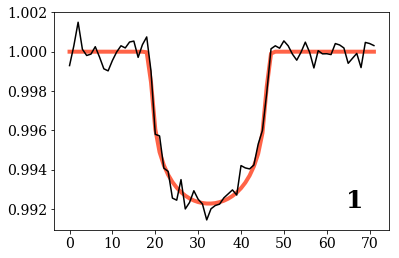

-----------------------------
[1 2]
[483.49555407 387.37581471]


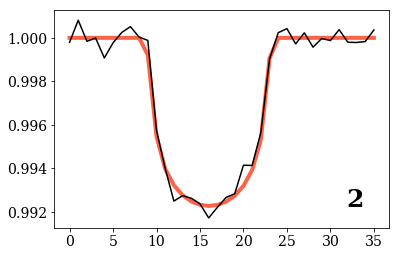

-----------------------------
[1 2 3]
[483.49555407 387.37581471 350.82030919]


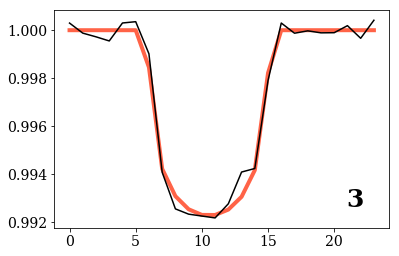

-----------------------------
[1 2 3 4]
[483.49555407 387.37581471 350.82030919 312.37778981]


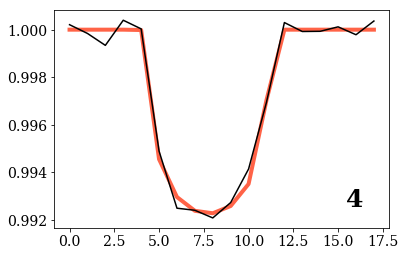

-----------------------------
[1 2 3 4 5]
[483.49555407 387.37581471 350.82030919 312.37778981 245.73208389]


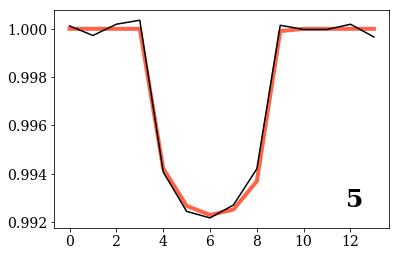

-----------------------------
[1 2 3 4 5 6]
[483.49555407 387.37581471 350.82030919 312.37778981 245.73208389
 219.56350161]


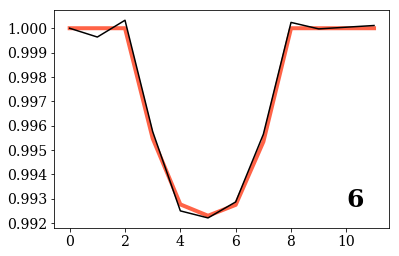

-----------------------------
[1 2 3 4 5 6 7]
[483.49555407 387.37581471 350.82030919 312.37778981 245.73208389
 219.56350161 177.2767178 ]


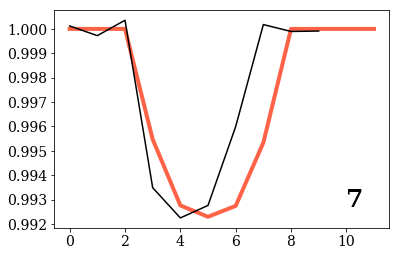

-----------------------------
[1 2 3 4 5 6 7 8]
[483.49555407 387.37581471 350.82030919 312.37778981 245.73208389
 219.56350161 177.2767178  145.29857021]


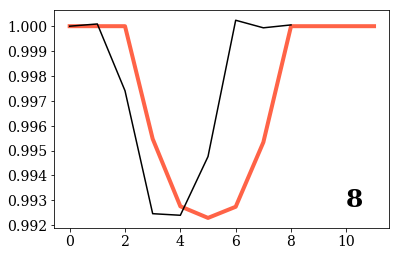

-----------------------------


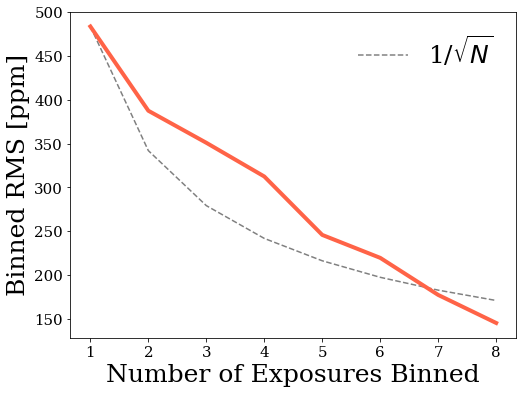

In [4]:
def bin_func(z):
    z=z
    bin_d=np.empty([len(white_data)/z])*np.nan
    bin_f=np.empty([len(white_data)/z])*np.nan
    k=0
    for i in range(0,len(bin_d)):
        bin_d[i]=np.nanmedian(np.copy(white_data[k:k+z]))
        bin_f[i]=np.nanmedian(np.copy(white_lcft[k:k+z]))
        k+=z
    return bin_d,bin_f

def bin_plot(d,f,z):
    plt.clf()
    plt.cla()
    plt.plot(f,'-',color='tomato',linewidth=4.0)
    plt.plot(d,'-',color='black')
    plt.figtext(0.8,0.2,z,fontsize=25,fontweight='bold')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show(block=False)

#############
SAVEPATH=SAVEPATH1
white_data=np.load(SAVEPATH+'LCwhite_br.npz')['data']
white_lcft=np.load(SAVEPATH+'LightCurve_fits_white.npz')['lightcurve_fit']

binsize=np.array([1])
rms_calc=np.sqrt(np.nanmean((white_lcft-white_data)**2.))
rms_arr=np.array([rms_calc])

print binsize
print rms_arr*10**6.

bin_plot(white_data,white_lcft,1)

##############
print '-----------------------------'
bin2_d,bin2_f=bin_func(2)

binsize=np.append(binsize,2)
rms_calc=np.sqrt(np.nanmean((bin2_f-bin2_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.

bin_plot(bin2_d,bin2_f,2)
    
###############   
print '-----------------------------'
bin3_d,bin3_f=bin_func(3)

binsize=np.append(binsize,3)
rms_calc=np.sqrt(np.nanmean((bin3_f-bin3_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin3_d,bin3_f,3)

##########
print '-----------------------------'
bin4_d,bin4_f=bin_func(4)

binsize=np.append(binsize,4)
rms_calc=np.sqrt(np.nanmean((bin4_f-bin4_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin4_d,bin4_f,4)

##########
print '-----------------------------'
bin5_d,bin5_f=bin_func(5)

binsize=np.append(binsize,5)
rms_calc=np.sqrt(np.nanmean((bin5_f-bin5_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin5_d,bin5_f,5)

##########
print '-----------------------------'
bin6_d,bin6_f=bin_func(6)

binsize=np.append(binsize,6)
rms_calc=np.sqrt(np.nanmean((bin6_f-bin6_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin6_d,bin6_f,6)

##########
print '-----------------------------'
bin7_d,bin7_f=bin_func(7)

binsize=np.append(binsize,7)
rms_calc=np.sqrt(np.nanmean((bin7_f-bin7_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin7_d,bin6_f,7)

##########
print '-----------------------------'
bin8_d,bin8_f=bin_func(8)

binsize=np.append(binsize,8)
rms_calc=np.sqrt(np.nanmean((bin8_f-bin8_d)**2.))
rms_arr=np.append(rms_arr,np.copy(rms_calc))
print binsize
print rms_arr*10**6.
bin_plot(bin8_d,bin6_f,8)

print '-----------------------------'
plt.figure(2,figsize=(8,6))
sqrtn=1/np.sqrt(binsize)

plt.plot(binsize,sqrtn*(rms_arr[0]/sqrtn[0])*10**6.,'--',color='grey',label='1/$\sqrt{N}$')
plt.plot(binsize,rms_arr*10**6.,color='tomato',linewidth=4.0)
plt.legend(fontsize=25,frameon=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Exposures Binned',fontsize=25)
plt.ylabel('Binned RMS [ppm]',fontsize=25)
plt.savefig('/Users/ermay/Documents/GradSchool/Research_Observing/Paper2/RMS_white.png')
plt.show(block=False)


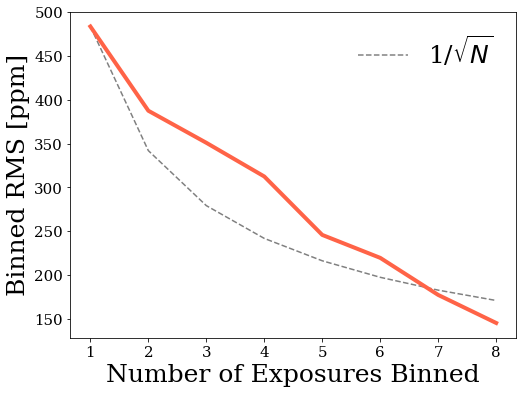

In [5]:
plt.figure(2,figsize=(8,6))
sqrtn=1/np.sqrt(binsize)

plt.plot(binsize,sqrtn*(rms_arr[0]/sqrtn[0])*10**6.,'--',color='grey',label='1/$\sqrt{N}$')
plt.plot(binsize,rms_arr*10**6.,color='tomato',linewidth=4.0)
plt.legend(fontsize=25,frameon=False)
#plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Exposures Binned',fontsize=25)
plt.ylabel('Binned RMS [ppm]',fontsize=25)
plt.savefig('/Users/ermay/Documents/GradSchool/Research_Observing/Paper2/RMS_white.png')
plt.show(block=False)

********** 800 **********
800 1442.0 1120.0 1.286812
********** 400 **********
400 1630.0 1083.0 1.505025
********** 200 **********
200 2374.0 1076.0 2.205633


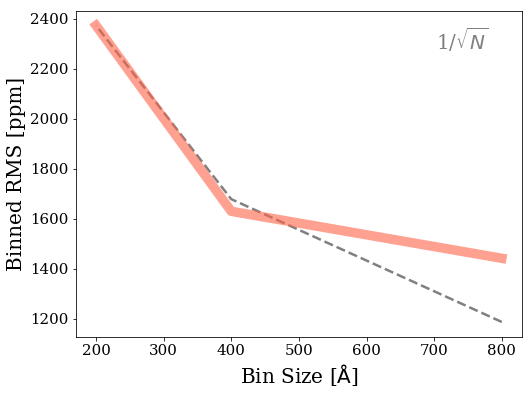

In [117]:
SAVEPATH=SAVEPATH1

#bin_widths=np.array([600,500,400,300,200])#,50,25,20])
bin_widths=np.array([800,400,200])#,50,25,20])
rmse_avg1=np.zeros_like(bin_widths)*np.nan
phtn_lev1=np.zeros_like(bin_widths)*np.nan
overn=np.zeros_like(bin_widths)*np.nan
for bw in range(0,len(bin_widths)):
    bins=np.load(SAVEPATH+'LC_bins_br_'+str(int(bin_widths[bw]))+'.npz')['bin_ctr']
    print '**********', bin_widths[bw], '**********'
    for b in range(0,1):#len(bins)):
        LC_fit=np.load(SAVEPATH+'Fits_'+str(int(bin_widths[bw]))+
                       '/LightCurve_fits_width'+str(int(bin_widths[bw]))
                       +'_bin'+str(int(bins[b]))+'.npz')['lightcurve_fit']
        data_lc=(np.load(SAVEPATH+'LC_bins_br_'+str(int(bin_widths[bw]))+'.npz')['data'])[:,b]
        counts=(np.load(SAVEPATH+'Binned_Data_'+str(int(bin_widths[bw]))+'.npz')['bin_counts'])[0,:,b]
        #print counts.shape
        rmse_avg1_s=np.sqrt(np.nansum((LC_fit-data_lc)**2.)/len(LC_fit))
                
        #rmse_avg1_s=(np.load(SAVEPATH+'LC_bins_br_'+str(int(bin_widths[bw]))+'.npz')['rmse_orig'])
        phtn_lev1_s=(np.load(SAVEPATH+'LC_bins_br_'+str(int(bin_widths[bw]))+'.npz')['err_p'])
        #phtn_lev1_s=np.nanmedian((1./np.sqrt((np.load(SAVEPATH+'LC_bins_'+str(int(bin_widths[bw]))+'.npz')['err_p']))),axis=0)
        #print '  ', bins[b], np.round(rmse_avg1_s[b],5), np.round(phtn_lev1_s[b],5)
        print bins[b], 
    rmse_avg1[bw]=(rmse_avg1_s)
    phtn_lev1[bw]=np.nanmedian(phtn_lev1_s)/np.sqrt(len(LC_fit))
    overn[bw]=np.nanmedian(1/np.sqrt(counts))/np.sqrt(len(LC_fit))
    print bin_widths[bw], np.round(rmse_avg1[bw],6)*10**6., np.round(phtn_lev1[bw],6)*10**6.,np.round(rmse_avg1[bw]/phtn_lev1[bw],6)

sqrN=1/np.sqrt(bin_widths)*10**6.
####################
plt.figure(figsize=(8,6))

plt.plot(bin_widths,sqrN*(rmse_avg1[-1]/sqrN[-1])*10**6.,'--',linewidth=2.5,color='grey')
plt.plot(bin_widths,rmse_avg1*10**6.,linewidth=9.5,color='tomato',alpha=0.6)

plt.figtext(0.75,0.79,'1/$\sqrt{N}$',color='grey',fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylabel('Binned RMS [ppm]',fontsize=20)
plt.xlabel('Bin Size [$\mathrm{\AA}$]',fontsize=20)

plt.show()
    

# Airmass Plots
#### plot is for CHECK STAR (obj#3) WHITE LIGHT on NIGHT 1

In [1]:
from RedNoise import airmass_func

obj=3
SAVEPATH=SAVEPATH1

ref_ind=int(n_exp/2)

def airmass_func(t,k):
    d0=data[obj,int(n_exp/2.),b]
    z0=z[int(n_exp/2.)]
    return d0*10**(-1.0*k*(z-z0)/2.5)

input_data=(np.load(SAVEPATH+'Binned_Data_White.npz')['bin_counts'])[obj,:,0]
time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']

n_exp=len(input_data)

z=(np.load(SAVEPATH+'HeaderData.npz')['airmass'])

NoiseModel_FitResults=np.load(SAVEPATH+'NoiseModel_FitResults_White.npz')
k=NoiseModel_FitResults['k']

airmass_fit=input_data[ref_ind]*10**(-1.0*k*(z-z[ref_ind])/2.5)

######################################################################

plt.figure(101,figsize=(10,6))
plt.gcf().subplots_adjust(bottom=0.20,top=0.95,left=0.16,right=0.95)

plt.plot(time0,airmass_fit/airmass_fit[ref_ind],'-',linewidth=2.5,color='black',zorder=1)
plt.plot(time0,input_data/input_data[ref_ind], '.',markersize=18, markerfacecolor='tomato', 
         markeredgecolor='black',markeredgewidth=1.5,zorder=0)

plt.figtext(0.18,0.29,'F$_{observed}$(t)=F$_{Z_0}$10$^{-k(\lambda)(Z(t)-Z_0)/2.5}$',fontsize=30,color='black')

plt.xlabel('Time from Mid-Transit [hrs]',fontsize=35)
plt.xticks(fontsize=20)

plt.ylabel('Relative Counts',fontsize=35)
plt.yticks(fontsize=20)

#plt.savefig(figpath+'airmass_fit.eps')
plt.show()


ImportError: cannot import name airmass_func

# Noise Model Plots
#### plot is for CHECK STAR (obj#3) WHITE LIGHT on NIGHT 1

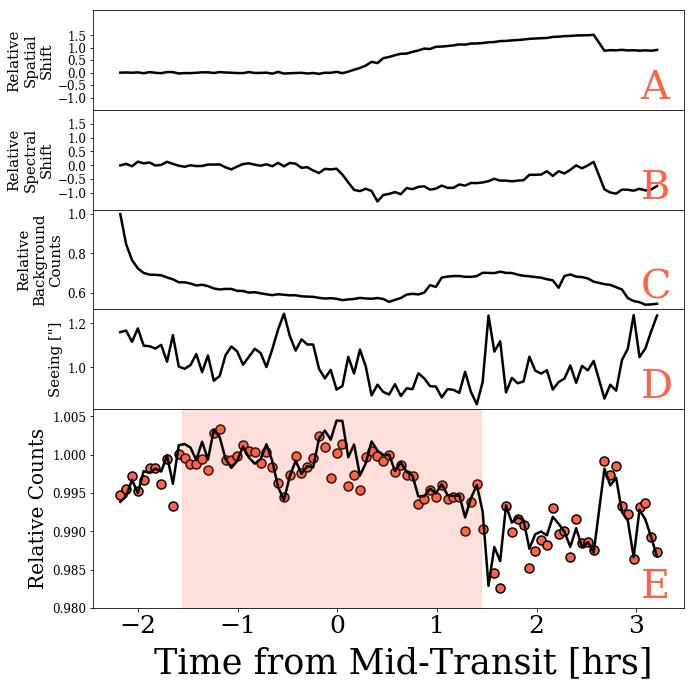

In [32]:
obj=3
SAVEPATH=SAVEPATH2
# if SAVEPATH=SAVEPATH2, fwhm=2 for binning!
fwhm_f=2.


input_data=(np.load(SAVEPATH+'Binned_Data_White.npz')['bin_counts'])[obj,:,0]
z=(np.load(SAVEPATH+'HeaderData.npz')['airmass'])
time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(time0)

NoiseModel_FitResults=np.load(SAVEPATH+'NoiseModel_FitResults_White.npz')
noisemodel=(NoiseModel_FitResults['noise_model'])[obj,:]

k=NoiseModel_FitResults['k']


airmass_fit=input_data[int(n_exp/2)]*10**(-1.0*k*(z-z[int(n_exp/2)])/2.5)

input_data/=airmass_fit
time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']


model_inputs=np.load(SAVEPATH+'NoiseModel_Inputs_200.npz')
X_loc=((model_inputs['white_x'])[obj,:]-(model_inputs['white_x'])[obj,0])
Y_loc=((model_inputs['yshift'])[obj,:])#(model_inputs['yshift']).reshape(-1,1)
bg_ct=((model_inputs['white_bg'])[obj,:])
fwhm_=fwhm_f*(np.load(SAVEPATH+'FlattenedSpectra.npz')['gaus_params'])[obj,:,:,2]#'fwhm_ar'])[0,:].reshape(-1,1)
fwhm_=(2.*np.sqrt(2.*np.log(2.))*np.nanmedian(fwhm_,axis=1))
ps=0.2

#####################################
plt.figure(figsize=(10,10))
gs1=gs.GridSpec(6,1)
gs1.update(bottom=0.12,top=0.95,left=0.13,right=0.95,wspace=0.0,hspace=0.0)

p1=plt.subplot(gs1[0:1])
p1.plot(time0,X_loc,'-',linewidth=2.5,color='black',zorder=1)
p1.tick_params(labelsize=12)
p1.set_yticks([-1.0,-0.5,0.0,0.5,1.0,1.5])
p1.set_ylabel(r"Relative" + "\n" + r"Spatial" + "\n" + r"Shift",fontsize=15)
p1.set_ylim(-1.5,2.5)

p2=plt.subplot(gs1[1:2])
p2.plot(time0,Y_loc,'-',linewidth=2.5,color='black',zorder=1)
p2.tick_params(labelsize=12)
p2.set_yticks([-1.0,-0.5,0.0,0.5,1.0,1.5])
p2.set_ylabel(r"Relative" + "\n" + r"Spectral" + "\n" + r"Shift",fontsize=15)
p2.set_ylim(-1.6,2.0)

p3=plt.subplot(gs1[2:3])
p3.plot(time0,bg_ct/np.nanmax(bg_ct),'-',linewidth=2.5,color='black',zorder=1)
p3.tick_params(labelsize=12)
p3.set_ylabel(r"Relative" + "\n" + r"Background" + "\n" + r"Counts",fontsize=15)

p4=plt.subplot(gs1[3:4])
p4.plot(time0,fwhm_*ps,'-',linewidth=2.5,color='black',zorder=1)
p4.tick_params(labelsize=12)
p4.set_ylabel('Seeing ["]',fontsize=15)

p5=plt.subplot(gs1[4:])
p5.fill_between(np.array([-24.*0.065,24.*0.06]),0.98,1.01,color='tomato',alpha=0.2)
p5.plot(time0,noisemodel/noisemodel[int(n_exp/2)],'-',linewidth=2.5,color='black',zorder=1)
p5.plot(time0,input_data/input_data[int(n_exp/2)], '.',markersize=18, markerfacecolor='tomato', 
         markeredgecolor='black',markeredgewidth=1.5,zorder=0)
p5.tick_params(labelsize=12,axis='y')
p5.tick_params(labelsize=25,axis='x')
p5.set_ylabel('Relative Counts',fontsize=20)
p5.set_ylim(0.98,1.006)

plt.figtext(0.5+0.06,0.03,'Time from Mid-Transit [hrs]',fontsize=35,ha='center')
#plt.figtext(0.02,0.5+0.05,'Relative Counts',fontsize=35,rotation='vertical',va='center')

ed=(0.83/6.)
tp=0.95-ed+0.015

plt.figtext(0.89,tp,'A', fontsize=40,color='tomato')
plt.figtext(0.89,tp-ed,'B',fontsize=40,color='tomato')
plt.figtext(0.89,tp-2.*ed,'C',fontsize=40,color='tomato')
plt.figtext(0.89,tp-3.*ed,'D',fontsize=40,color='tomato')
plt.figtext(0.89,tp-5.*ed,'E',fontsize=40,color='tomato')




plt.savefig(figpath+'noisemodel_example.pdf')
plt.show()


# Limb Darkening
### night 1

[0.9459, 0.7502, 0.5424, 0.433, 0.3385, 0.1813]
[-0.085, 0.0799, 0.206, 0.2443, 0.2528, 0.2953]
[0.72257674 0.69347758 0.6225358  0.61075403 0.53419816 0.53117621
 0.43012061 0.38474102 0.37140141 0.3218941  0.30995752        nan
        nan        nan        nan        nan        nan]
[0.23542235 0.26803127 0.26804392 0.2893261  0.26743569 0.27994048
 0.21402547 0.18042985 0.19228614 0.17122254 0.16815492        nan
        nan        nan        nan        nan        nan]
[0.03817006 0.02927623 0.04741075 0.04139818 0.07291157 0.06367849
 0.06549552 0.05978988 0.05271095 0.03905916 0.03938653        nan
        nan        nan        nan        nan        nan]
[0.02977085 0.01545415 0.04532634 0.02940184 0.05332182 0.05252497
 0.06621701 0.04320945 0.0461311  0.03104181 0.02398257        nan
        nan        nan        nan        nan        nan]


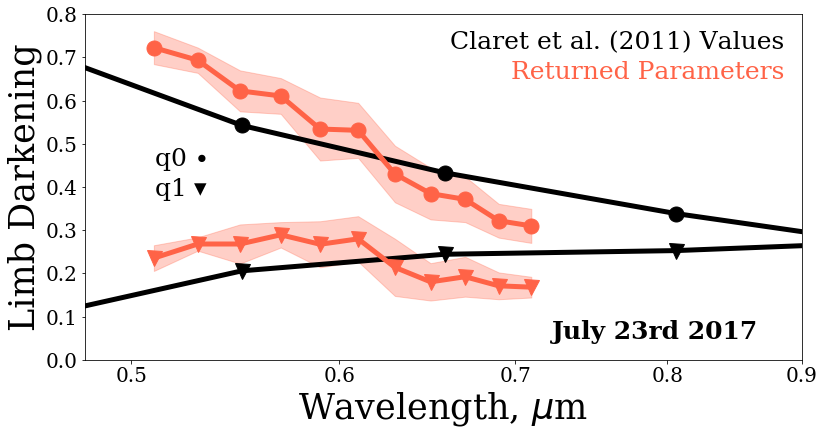

In [4]:
width=200
SAVEPATH=SAVEPATH1

#######
import sys
sys.path.insert(0,SAVEPATH) 
from SystemCons import *

wave=np.array([3640,4450,5510,6580,8060,12200])
c1_ac=q0
c2_ac=q1

print c1_ac
print c2_ac
#######

time0=24.*np.load(SAVEPATH1+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
n_bins=len(bin_ctr)

c1_fit=np.empty([n_bins])*np.nan
c2_fit=np.empty([n_bins])*np.nan
c1_err=np.empty([n_bins,2])*np.nan
c2_err=np.empty([n_bins,2])*np.nan

for b in range(0,len(bin_ctr)):
    if bin_ctr[b]>=7200:
        continue
    filename=(SAVEPATH+'Fits_'+str(int(width))+
                       '/LightCurve_fits_width'+str(int(width))
                       +'_bin'+str(int(bin_ctr[b]))+'.npz')
    mcmc=np.load(filename)
    c1_fit[b]=(mcmc['params'])[5]
    c2_fit[b]=(mcmc['params'])[6]
    c1_err[b,:]=(mcmc['paramserr'])[1,:]
    c2_err[b,:]=(mcmc['paramserr'])[2,:]
    del mcmc
    
c1_err=np.nanmedian(c1_err,axis=1)
c2_err=np.nanmedian(c2_err,axis=1)
    
print c1_fit
print c2_fit
print c1_err
print c2_err

bin_ctr=bin_ctr[np.isfinite(c1_fit)]

c1_err=c1_err[np.isfinite(c1_fit)]
c1_fit=c1_fit[np.isfinite(c1_fit)]
c2_err=c2_err[np.isfinite(c2_fit)]
c2_fit=c2_fit[np.isfinite(c2_fit)]


##################
ft_c='tomato'

plt.figure(301,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.95)

plt.plot(np.log10(wave),c1_ac,color='black',linewidth=5.0)
plt.plot(np.log10(bin_ctr),c1_fit,color=ft_c,linewidth=5.0)
plt.plot(np.log10(wave),c1_ac,'o',color='black',linewidth=5.0,markersize=15)
plt.plot(np.log10(bin_ctr),c1_fit,'o',color=ft_c,linewidth=5.0,markersize=15)

plt.plot(np.log10(wave),c2_ac,color='black',linewidth=5.0)
plt.plot(np.log10(bin_ctr),c2_fit,color=ft_c,linewidth=5.0)
plt.plot(np.log10(wave),c2_ac,'v',color='black',linewidth=5.0,markersize=15)
plt.plot(np.log10(bin_ctr),c2_fit,'v',color=ft_c,linewidth=5.0,markersize=15)

plt.fill_between(np.log10(bin_ctr),c1_fit-c1_err,c1_fit+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(np.log10(bin_ctr),c2_fit-c2_err,c2_fit+c2_err,color=ft_c,alpha=0.3)
#plt.errorbar(np.log10(bin_ctr),c1_fit,yerr=c1_err,color='tomato',elinewidth=3.0,capsize=0.0,capthick=2.0,alpha=0.5,zorder=1)
#plt.errorbar(np.log10(bin_ctr),c2_fit,yerr=c2_err,color='tomato',elinewidth=3.0,capsize=0.0,capthick=2.0,alpha=0.5,zorder=1)


plt.figtext(0.93,0.87,'Claret et al. (2011) Values',color='black',fontsize=25,ha='right')
plt.figtext(0.93,0.80,'Returned Parameters',color=ft_c,fontsize=25,ha='right')
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=25)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=25)

plt.figtext(0.9,0.2,'July 23rd 2017',color='black',ha='right',fontsize=25,weight='bold')


plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=20)
plt.xlim(np.log10(4800),np.log10(9000))

plt.yticks(fontsize=20)
plt.ylim(0.0,0.8)

plt.xlabel('Wavelength, ${\mu}$m',fontsize=35)
plt.ylabel('Limb Darkening',fontsize=35)

plt.savefig(figpath+'limbdark_night1.pdf')
plt.show()


In [144]:
NIGHT1_bins=bin_ctr
NIGHT1_c1=c1_fit
NIGHT1_c2=c2_fit
NIGHT1_c1_err=c1_err
NIGHT1_c2_err=c2_err

print bin_ctr

[5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900. 7100.]


[0.9459, 0.7502, 0.5424, 0.433, 0.3385, 0.1813]
[-0.085, 0.0799, 0.206, 0.2443, 0.2528, 0.2953]
[4800. 5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]
[       nan 0.57506368 0.55068509 0.53387143 0.47906629 0.52234456
 0.47602325        nan 0.38271308]
[       nan 0.14132056 0.22339936 0.27272526 0.26175796 0.32860675
 0.32559048        nan 0.30194213]
[       nan 0.05013458 0.03988411 0.03905745 0.04355693 0.03518093
 0.04325721        nan 0.06728023]
[       nan 0.0502594  0.04293277 0.03665965 0.04465407 0.02279219
 0.02562177        nan 0.05050747]


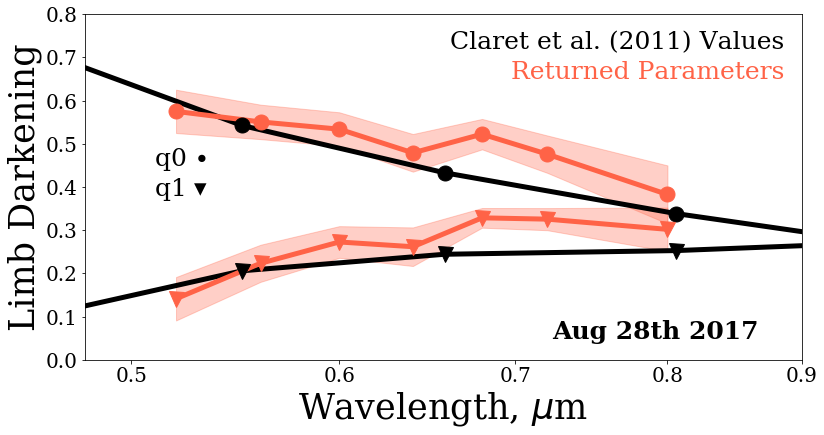

In [170]:
width=400
SAVEPATH=SAVEPATH2

#######
import sys
sys.path.insert(0,SAVEPATH) 
from SystemCons import *

wave=np.array([3640,4450,5510,6580,8060,12200])
c1_ac=q0
c2_ac=q1

print c1_ac
print c2_ac
#######

time0=24.*np.load(SAVEPATH1+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
print bin_ctr
n_bins=len(bin_ctr)

c1_fit=np.empty([n_bins])*np.nan
c2_fit=np.empty([n_bins])*np.nan
c1_err=np.empty([n_bins,2])*np.nan
c2_err=np.empty([n_bins,2])*np.nan

for b in range(0,len(bin_ctr)):
    if bin_ctr[b]==7600 or b==0:
        continue
    filename=(SAVEPATH+'Fits_'+str(int(width))+
                       '/LightCurve_fits_width'+str(int(width))
                       +'_bin'+str(int(bin_ctr[b]))+'.npz')
    mcmc=np.load(filename)
    c1_fit[b]=(mcmc['params'])[5]
    c2_fit[b]=(mcmc['params'])[6]
    c1_err[b,:]=(mcmc['paramserr'])[1,:]
    c2_err[b,:]=(mcmc['paramserr'])[2,:]
    del mcmc
    
c1_err=np.nanmedian(c1_err,axis=1)
c2_err=np.nanmedian(c2_err,axis=1)
    
print c1_fit
print c2_fit
print c1_err
print c2_err

bin_ctr=bin_ctr[np.isfinite(c1_fit)]

c1_err=c1_err[np.isfinite(c1_fit)]
c1_fit=c1_fit[np.isfinite(c1_fit)]
c2_err=c2_err[np.isfinite(c2_fit)]
c2_fit=c2_fit[np.isfinite(c2_fit)]

##################
ft_c='tomato'

plt.figure(301,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.95)

plt.plot(np.log10(wave),c1_ac,color='black',linewidth=5.0)
plt.plot(np.log10(bin_ctr),c1_fit,color=ft_c,linewidth=5.0)
plt.plot(np.log10(wave),c1_ac,'o',color='black',linewidth=5.0,markersize=15)
plt.plot(np.log10(bin_ctr),c1_fit,'o',color=ft_c,linewidth=5.0,markersize=15)

plt.plot(np.log10(wave),c2_ac,color='black',linewidth=5.0)
plt.plot(np.log10(bin_ctr),c2_fit,color=ft_c,linewidth=5.0)
plt.plot(np.log10(wave),c2_ac,'v',color='black',linewidth=5.0,markersize=15)
plt.plot(np.log10(bin_ctr),c2_fit,'v',color=ft_c,linewidth=5.0,markersize=15)

plt.fill_between(np.log10(bin_ctr),c1_fit-c1_err,c1_fit+c1_err,color=ft_c,alpha=0.3)
plt.fill_between(np.log10(bin_ctr),c2_fit-c2_err,c2_fit+c2_err,color=ft_c,alpha=0.3)


plt.figtext(0.93,0.87,'Claret et al. (2011) Values',color='black',fontsize=25,ha='right')
plt.figtext(0.93,0.80,'Returned Parameters',color=ft_c,fontsize=25,ha='right')
plt.figtext(0.2,0.6,'q0 $\\bullet$',color='black',fontsize=25)
plt.figtext(0.2,0.53,'q1 $\\blacktriangledown$',color='black',fontsize=25)

plt.figtext(0.9,0.2,'Aug 28th 2017',color='black',ha='right',fontsize=25,weight='bold')


plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=20)
plt.xlim(np.log10(4800),np.log10(9000))

plt.yticks(fontsize=20)
plt.ylim(0.0,0.8)

plt.xlabel('Wavelength, ${\mu}$m',fontsize=35)
plt.ylabel('Limb Darkening',fontsize=35)

plt.savefig(figpath+'limbdark_night2.pdf')
plt.show()


In [171]:
NIGHT2_bins=bin_ctr
NIGHT2_c1=c1_fit
NIGHT2_c2=c2_fit
NIGHT2_c1_err=c1_err
NIGHT2_c2_err=c2_err

print NIGHT2_bins

[5200. 5600. 6000. 6400. 6800. 7200. 8000.]


# LCS
#### Night 1

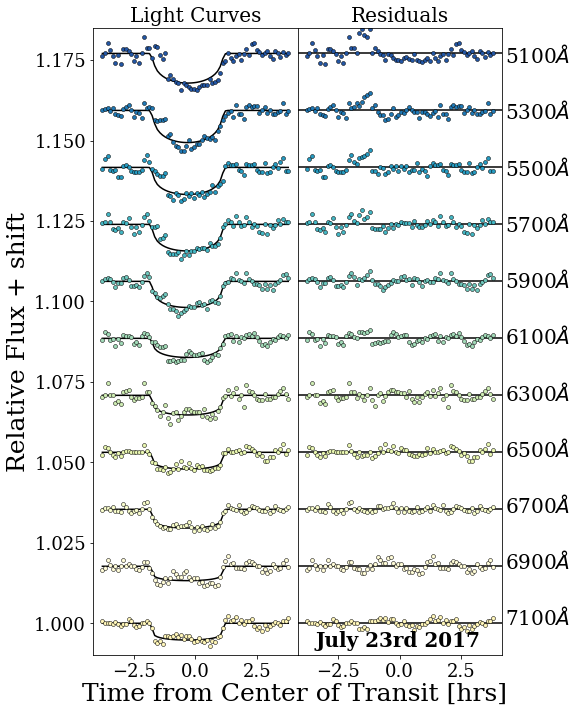

In [16]:
width=200
SAVEPATH=SAVEPATH1

ymin=0.99
ymax=1.185#1.055

wav_fit=np.linspace(4600,9000,100)

#########
time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
n_bins=len(bin_ctr)

LC_fits=np.empty([n_exp,n_bins])*np.nan

for b in range(0,len(bin_ctr)):
    filename=(SAVEPATH+'Fits_'+str(int(width))+
                       '/LightCurve_fits_width'+str(int(width))
                       +'_bin'+str(int(bin_ctr[b]))+'.npz')
    mcmc=np.load(filename)
    LC_fits[:,b]=mcmc['lightcurve_fit']
    del mcmc
    
LC_data=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['data']

##############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))                                                                                                                  
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
#####################
fig,ax=plt.subplots(1,2,figsize=(8,10.5))
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=40.

for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]>=7300:
        #shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    ax[0].plot(time0,LC_fits[:,b]+shift,'-',linewidth=1.5,color='black')
    ax[0].plot(time0,LC_data[:,b]+shift,'.',
               markersize=8,markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
              markeredgecolor='black',markeredgewidth=0.5)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)      

shift=0
for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]>=7300:
        #shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    ax[1].axhline(y=shift,linestyle='-',linewidth=1.5,color='black')
    ax[1].plot(time0,LC_data[:,b]-LC_fits[:,b]+shift,'.',
               markersize=8,markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
              markeredgecolor='black',markeredgewidth=0.5)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=18)
#ax[1].set_xlabel('Time [hrs]',fontsize=25)
ax[1].set_title('Residuals',fontsize=20)  

shift=0
    
plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')

shift=0
for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]>=7300:
        #shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    plt.figtext(0.865,0.16+4.2*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=20)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)

plt.figtext(0.68,0.132,'July 23rd 2017',fontsize=20,weight='bold',ha='center')

plt.savefig(figpath+'LCS_night1.pdf')
plt.show()

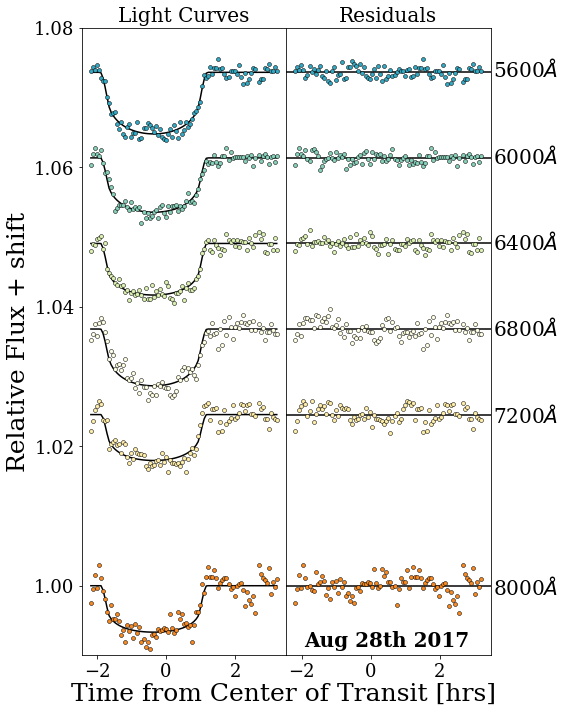

In [17]:
width=400
SAVEPATH=SAVEPATH2

ymin=0.99
ymax=1.08



#########
time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
n_bins=len(bin_ctr)

LC_fits=np.empty([n_exp,n_bins])*np.nan

for b in range(0,len(bin_ctr)):
    filename=(SAVEPATH+'Fits_'+str(int(width))+
                       '/LightCurve_fits_width'+str(int(width))
                       +'_bin'+str(int(bin_ctr[b]))+'.npz')
    mcmc=np.load(filename)
    LC_fits[:,b]=mcmc['lightcurve_fit']
    del mcmc
    
LC_data=np.load(SAVEPATH+'LC_bins_br_'+str(int(width))+'.npz')['data']

##############
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))                                                                                                                   
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
#####################
fig,ax=plt.subplots(1,2,figsize=(8,10.5))
fig.subplots_adjust(wspace=0, hspace=0)
plt.gcf().subplots_adjust(bottom=0.12,top=0.95,left=0.15,right=0.86)

shift=0
dv=55.

for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]==7600:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    if b==0 or b==1:
        continue
    ax[0].plot(time0,LC_fits[:,b]+shift,'-',linewidth=1.5,color='black')
    ax[0].plot(time0,LC_data[:,b]+shift,'.',
               markersize=8,markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
              markeredgecolor='black',markeredgewidth=0.5)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[0].set_ylim(ymin,ymax)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].set_ylabel('Relative Flux + shift',fontsize=25)
ax[0].set_title('Light Curves',fontsize=20)      

shift=0
for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]==7600:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    if b==0 or b==1:
        continue
    ax[1].axhline(y=shift,linestyle='-',linewidth=1.5,color='black')
    ax[1].plot(time0,LC_data[:,b]-LC_fits[:,b]+shift,'.',
               markersize=8,markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
              markeredgecolor='black',markeredgewidth=0.5)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)
ax[1].set_ylim(ymin-1.0,ymax-1.0)
ax[1].set_yticks([])
ax[1].xaxis.set_tick_params(labelsize=18)
#ax[1].set_xlabel('Time [hrs]',fontsize=25)
ax[1].set_title('Residuals',fontsize=20)  

shift=0
    
plt.figtext(0.5,0.06,'Time from Center of Transit [hrs]',fontsize=25,ha='center')

shift=0
for b in range(n_bins-1,-1,-1):
    if bin_ctr[b]==7600:
        shift+=0.75*(n_bins/dv)/(n_bins+1.)
        continue
    if b==0 or b==1:
        continue
    plt.figtext(0.865,0.2+9.3*shift,str(int(bin_ctr[b]))+'$\AA$',color='black',fontsize=20)
    shift+=0.75*(n_bins/dv)/(n_bins+1.)

plt.figtext(0.68,0.132,'Aug 28th 2017',fontsize=20,weight='bold',ha='center')

plt.savefig(figpath+'LCS_night2.pdf')
plt.show()

In [18]:
print bin_ctr

[4800. 5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]


# TSpec Plot
#### plot is for CHECK STAR (obj#3) WHITE LIGHT on NIGHT 1

[5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900. 7100. 7300.
 7500. 7700. 7900. 8100. 8300.]
[0.08238229 0.08600941 0.0800637  0.07936397 0.08005289 0.06836998
 0.0712228  0.06653763 0.07051227 0.06237939 0.0675573         nan
        nan        nan        nan        nan        nan]
[3111.3260294  1988.24227627 3148.98137927 2929.09729439 3354.96463718
 2906.10641499 3403.76231332 2839.26330872 1976.02667796 2584.82403347
 2069.56122003           nan           nan           nan           nan
           nan           nan]
0.07777692625291555
581.7937988497005
476.679031365
1321.039264978985
[[ 0.00058425 -0.00221365]
 [-0.00221365  0.00838856]]
*************************
FIT SLOPE: -0.146201263081563
SLOPE_ERR: 0.024171336804733542
FIT INTER: 0.6277563506129178
INTER_ERR: 0.09158907013700476
*************************
 MEASURED/NOMINAL: 27.73438274035049
*************************
[22.09014987 24.84241019 20.3308052  19.79984914 20.32260369 11.45761088
 13.62232857 10.06722318 

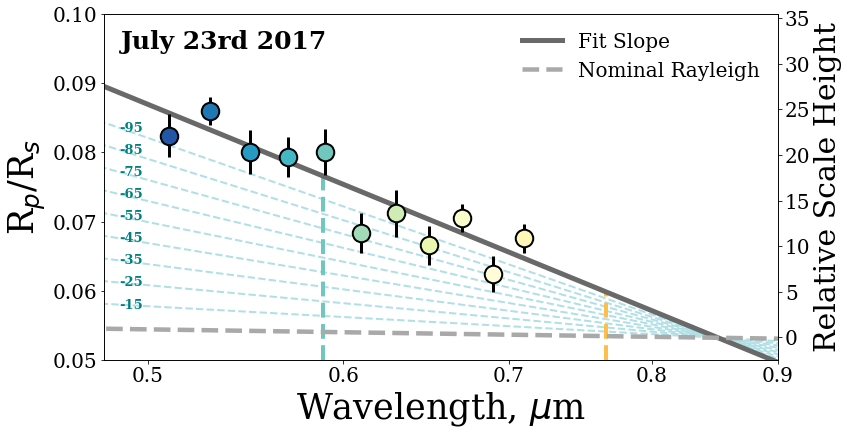

In [5]:
width=200
SAVEPATH=SAVEPATH1

albedo=0.0
mu=2.3
alpha=-4.

relw=8500.

tt=0
bt=0

plttop1=0.10
pltbot1=0.05

es=1.5

from scipy.optimize import curve_fit


#########
time0=24.*np.load(SAVEPATH1+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
print bin_ctr

n_bins=len(bin_ctr)

rp_fit=np.empty([n_bins])*np.nan
rp_err=np.empty([n_bins,2])*np.nan

for b in range(0,len(bin_ctr)):
    if bin_ctr[b]>=7200:
        continue
    mcmc=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_width'+str(int(width))+'_bin'+str(int(bin_ctr[b]))+'.npz')
    rp_fit[b]=(mcmc['params'])[2]
    rp_err[b,:]=(mcmc['paramserr'])[0,:]
    del mcmc

rp_err=np.nanmedian(rp_err,axis=1)

rpwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'][2])
rpwhite_err=np.nanmedian((np.load(SAVEPATH+'LightCurve_fits_white.npz')['paramserr'][0,:]))

bin_ctr=bin_ctr[tt:n_bins-bt]
rp_fit=rp_fit[tt:n_bins-bt]
rp_err=es*rp_err[tt:n_bins-bt]
n_bins=len(bin_ctr)


print rp_fit
print rp_err*10**6.
print rpwhite
print rpwhite_err*10**6.

##############
wav_fit=np.linspace(4600,9000,100)

colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))                                                                                                                    
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

#####################
import sys
sys.path.insert(0,SAVEPATH) 
from SystemCons import *

#Loaded from SystemCons
# Rs * Rsun
# rp/rs
# mp *Mjup
# per in days
# smacm, sma/Rs
# Grav in cgs
mh=1.67*10**-24  #mass of hydrogen, grams
kb=1.38*10**-16  #boltzmann constant,erg/K

g_planet=Grav*(mp*Mjup)/(rp*Rs)**2.  #cm/s^2
print g_planet 

T_eq=Ts*(1-albedo)**(0.25)*np.sqrt(Rs/(2*smacm))
print T_eq


    
# ray_mu=np.empty([len(wav_fit),3])
# mu_arr=np.array([2.2,1.9,1.6])
# for m in range(0,len(mu_arr)):
#     mf=mu_arr[m]
#     nrs=alpha*(1./Rs)*(kb*T_eq)/(mf*mh*g_planet)
#     nri=rp_fit[int(n_bins/2)]-nrs*np.log10(bin_ctr[int(n_bins/2)])
#     ray_mu[:,m]=nrs*np.log10(wav_fit)+nri
#####################
#print bin_ctr
bin_ctr=bin_ctr[np.isfinite(rp_fit)]
#print bin_ctr
rp_err=rp_err[np.isfinite(rp_err)]
rp_fit=rp_fit[np.isfinite(rp_fit)]
n_bins=len(bin_ctr)

def line(x, a, b):
    return a * x + b

#################

#p0=np.array([nom_ray_slope,nom_ray_int])
ray_fit_params,ray_fit_cov=curve_fit(line,np.log10(bin_ctr),rp_fit,sigma=(es*rp_err),absolute_sigma=True,maxfev=100000)
print ray_fit_cov
#ray_fit_params,ray_fit_cov=np.polyfit(np.log10(bin_ctr),rp_fit,1,w=1./rp_err,cov=True)
print '*************************'
print 'FIT SLOPE:', ray_fit_params[0]
print 'SLOPE_ERR:', np.sqrt(np.diag(ray_fit_cov))[0]
print 'FIT INTER:', ray_fit_params[1]
print 'INTER_ERR:', np.sqrt(np.diag(ray_fit_cov))[1]
print '*************************'

ray_fit=line((np.log10(wav_fit)),ray_fit_params[0],ray_fit_params[1])

#####################

nom_ray_slope=alpha*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
#print nom_ray_slope

ind=np.argmin(np.abs(wav_fit-relw))
nom_ray_int=ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
#print nom_ray_int

nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int
#print nom_ray

ind=np.argmin(np.abs(wav_fit-relw))
alph_arr=np.array([-15,-25,-35,-45,-55,-65,-75,-85,-95])
ray_alph=np.empty([len(wav_fit),len(alph_arr)])
for a in range(0,len(alph_arr)):
    al=alph_arr[a]
    nrs=al*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
    nri=ray_fit[ind]-nrs*np.log10(wav_fit[ind])
    ray_alph[:,a]=nrs*np.log10(wav_fit)+nri
    
print ' MEASURED/NOMINAL:', ray_fit_params[0]/nom_ray_slope
print '*************************'

###########
nomH=(1./Rs)*(kb*T_eq)/(mh*mu*g_planet)
rprs_ref=ray_fit_params[0]*np.log10(relw)+ray_fit_params[1]
delrprs=rp_fit-rprs_ref

delH=(delrprs/nomH)
print delH


#########

fig=plt.figure(101,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.90)

ax=fig.add_subplot(111)
ax.plot(np.log10(wav_fit),ray_fit,'-',color='dimgrey',linewidth=5.0,zorder=1,label='Fit Slope')

sig=1
fit_up=[ray_fit_params[0]+sig*np.sqrt(np.diagonal(ray_fit_cov))[0],ray_fit_params[1]-sig*np.sqrt(np.diagonal(ray_fit_cov))[1]]
fit_dn=[ray_fit_params[0]-sig*np.sqrt(np.diagonal(ray_fit_cov))[0],ray_fit_params[1]+sig*np.sqrt(np.diagonal(ray_fit_cov))[1]]
y1=line(np.log10(wav_fit),*fit_up)
y2=line(np.log10(wav_fit),*fit_dn)
#plt.fill_between(np.log10(wav_fit),y1,y2,color='grey',alpha=0.1)

ax.plot(np.log10(wav_fit),nom_ray,'--',color='darkgrey',linewidth=4.5,zorder=1,label='Nominal Rayleigh')

for a in range(0,len(alph_arr)):
    ax.plot(np.log10(wav_fit),ray_alph[:,a],'--',color='powderblue',linewidth=2.0,zorder=0)
    ind=np.argmin(np.abs(wav_fit-4850))
    ax.annotate(alph_arr[a],xy=(np.log10(wav_fit[ind]),ray_alph[ind,a]),
                 color='teal',fontsize=13,va='center',weight='bold')
    
# for m in range(0,len(mu_arr)):
#     plt.plot(np.log10(wav_fit),ray_mu[:,m],'--',color='mediumpurple',linewidth=2.0,zorder=0)
#     ind=np.argmin(np.abs(wav_fit-4850))
#     plt.annotate(mu_arr[m],xy=(np.log10(wav_fit[ind]),ray_alph[ind,m]),
#                  color='darkviolet',fontsize=13,va='center',weight='bold')

for b in range(0,n_bins):
    if bin_ctr[b]>=7600:
        continue
    ax.errorbar(np.log10(bin_ctr[b]),rp_fit[b],yerr=1.*rp_err[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
    ax.plot(np.log10(bin_ctr[b]),rp_fit[b],'.',markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
    
ax.axvline(x=np.log10(5890),ymin=0.0,ymax=(np.poly1d(ray_fit_params)(np.log10(5890))-pltbot1)/(plttop1-pltbot1),
            linestyle='--',color=scal_m.to_rgba(5890),zorder=0,linewidth=4.0)
ax.axvline(x=np.log10(7665),ymin=0.0,ymax=(np.poly1d(ray_fit_params)(np.log10(7665))-pltbot1)/(plttop1-pltbot1),
            linestyle='--',color=scal_m.to_rgba(7665),zorder=0,linewidth=4.0)

plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'])
ax.set_xlim(np.log10(4800),np.log10(9000))
ax.set_xlabel('Wavelength, $\mu$m',fontsize=35)

ax.tick_params(labelsize=20)
ax.set_ylim(pltbot1,plttop1)
ax.set_ylabel('R$_p$/R$_s$',fontsize=35)

ax.legend(loc='upper right',fontsize=20,frameon=False)
plt.figtext(0.14,0.87,'July 23rd 2017',color='black',ha='left',fontsize=25,weight='bold')

ax2=ax.twinx()
ax2.tick_params(labelsize=20)
ax2.set_ylabel('Relative Scale Height',fontsize=30)

ax2.set_ylim(ymin=(pltbot1-rprs_ref)/nomH,ymax=(plttop1-rprs_ref)/nomH)


plt.savefig(figpath+'Tspec_night1.eps')
plt.show()

In [6]:
NIGHT1_bins=bin_ctr
NIGHT1_RP=rp_fit
NIGHT1_rerr=rp_err
NIGHT1_slope=ray_fit_params[0]
NIGHT1_serr=np.sqrt(np.diag(ray_fit_cov))[0]

NIGHT1_rpfit=ray_fit

[4800. 5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]
[4800. 5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]
[       nan 0.09705094 0.08415798 0.07887524 0.07774405 0.08032899
 0.07287599        nan 0.07473952]
[          nan 2048.59771735 1286.1596523  1207.75215662 1334.50657775
 1729.68232733 1897.78853304           nan 2601.22247679]
83240.20666993008
0.000981222844232109
476.679031365
1321.039264978985
*************************
FIT SLOPE: -0.1007763959909187
SLOPE_ERR: 0.024171336804733542
*************************
 MEASURED/NOMINAL: 19.117284479587557
*************************


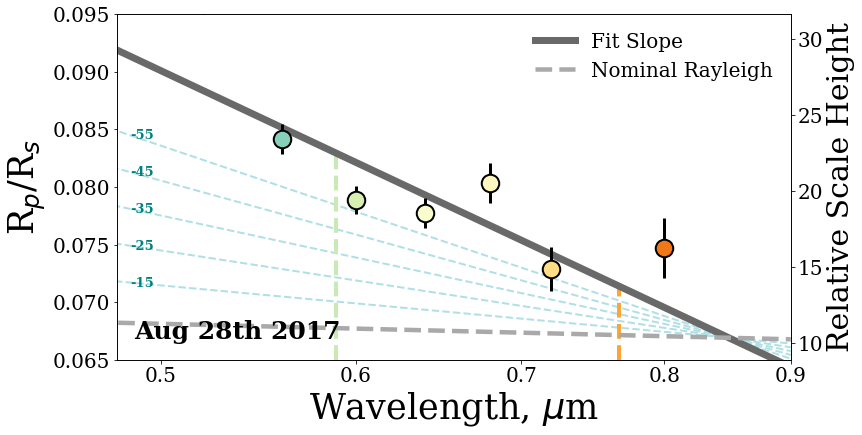

In [7]:
width=400
SAVEPATH=SAVEPATH2

albedo=0.0
mu=2.3
alpha=-4.

relw=8500.

bt=0

plttop=0.095
pltbot=0.065

es=1.5


#########
time0=24.*np.load(SAVEPATH1+'Obs_times.npz')['times']
n_exp=len(time0)

bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
n_bins=len(bin_ctr)
print bin_ctr

rp_fit=np.empty([n_bins])*np.nan
rp_err=np.empty([n_bins,2])*np.nan

for b in range(0,len(bin_ctr)):
    if bin_ctr[b]==7600 or b==0:
        continue
    filename=SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_width'+str(int(width))+'_bin'+str(int(bin_ctr[b]))+'.npz'
    mcmc=np.load(filename)
    #mcmc=np.load(SAVEPATH+'Fits_'+str(int(width))+'/Orig/LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz')
    rp_fit[b]=(mcmc['params'])[2]
    rp_err[b,:]=(mcmc['paramserr'])[0,:]
    del mcmc

rp_err=np.nanmedian(rp_err,axis=1)

rpwhite=(np.load(SAVEPATH+'LightCurve_fits_white.npz')['params'][2])
rpwhite_err=np.nanmedian((np.load(SAVEPATH+'LightCurve_fits_white.npz')['paramserr'][0,:]))

# bin_ctr=bin_ctr[:bt]
# rp_fit=rp_fit[:bt]
# rp_err=rp_err[:bt]
bin_ctr=bin_ctr[bt:]
rp_fit=rp_fit[bt:]
rp_err=es*rp_err[bt:]
n_bins=len(bin_ctr)

rp_fit[0]=np.nan
rp_err[0]=np.nan

print bin_ctr
print rp_fit
print rp_err*10**6.
print rpwhite*10**6.
print rpwhite_err

##############
wav_fit=np.linspace(4000,9000,100)

colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])

#####################
import sys
sys.path.insert(0,SAVEPATH) 
from SystemCons import *

#Loaded from SystemCons
# Rs * Rsun
# rp/rs
# mp *Mjup
# per in days
# smacm, sma/Rs
# Grav in cgs
mh=1.67*10**-24  #mass of hydrogen, grams
kb=1.38*10**-16  #boltzmann constant,erg/K

g_planet=Grav*(mp*Mjup)/(rp*Rs)**2.  #cm/s^2
print g_planet 

T_eq=Ts*(1-albedo)**(0.25)*np.sqrt(Rs/(2*smacm))
print T_eq


    
# ray_mu=np.empty([len(wav_fit),3])
# mu_arr=np.array([2.2,1.9,1.6])
# for m in range(0,len(mu_arr)):
#     mf=mu_arr[m]
#     nrs=alpha*(1./Rs)*(kb*T_eq)/(mf*mh*g_planet)
#     nri=rp_fit[int(n_bins/2)]-nrs*np.log10(bin_ctr[int(n_bins/2)])
#     ray_mu[:,m]=nrs*np.log10(wav_fit)+nri
#####################
bin_ctr0=bin_ctr[np.isfinite(rp_fit)]
rp_err0=rp_err[np.isfinite(rp_err)]
rp_fit0=rp_fit[np.isfinite(rp_fit)]
n_bins=len(bin_ctr)

ray_fit_params=np.polyfit(np.log10(bin_ctr0),rp_fit0,1,w=1./rp_err0)
print '*************************'
print 'FIT SLOPE:', ray_fit_params[0]
print 'SLOPE_ERR:', np.sqrt(np.diag(ray_fit_cov))[0]
print '*************************'

ray_fit=np.poly1d(ray_fit_params)(np.log10(wav_fit))

#################

nom_ray_slope=alpha*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
#print nom_ray_slope

ind=np.argmin(np.abs(wav_fit-relw))
nom_ray_int=ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
#print nom_ray_int

nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int
#print nom_ray

ind=np.argmin(np.abs(wav_fit-relw))
alph_arr=np.array([-15,-25,-35,-45,-55])#,-65,-75,-85,-95,-105,-115,-125,-135,-145,-155,-165,-175])
ray_alph=np.empty([len(wav_fit),len(alph_arr)])
for a in range(0,len(alph_arr)):
    al=alph_arr[a]
    nrs=al*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
    nri=ray_fit[ind]-nrs*np.log10(wav_fit[ind])
    ray_alph[:,a]=nrs*np.log10(wav_fit)+nri

    
print ' MEASURED/NOMINAL:', ray_fit_params[0]/nom_ray_slope
print '*************************'

#####################

fig=plt.figure(101,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.90)

ax=fig.add_subplot(111)

ax.plot(np.log10(wav_fit),ray_fit,'-',color='dimgrey',linewidth=7.0,zorder=1,label='Fit Slope')

sig=1.
y1=np.poly1d([ray_fit_params[0]+sig*ray_fit_cov[0,0]**0.5,ray_fit_params[1]-sig*ray_fit_cov[1,1]**0.5])(np.log10(wav_fit))
y2=np.poly1d([ray_fit_params[0]-sig*ray_fit_cov[0,0]**0.5,ray_fit_params[1]+sig*ray_fit_cov[1,1]**0.5])(np.log10(wav_fit))
#plt.fill_between(np.log10(wav_fit),y1,y2,color='grey',alpha=0.1)

ax.plot(np.log10(wav_fit),nom_ray,'--',color='darkgrey',linewidth=4.5,zorder=1,label='Nominal Rayleigh')

for a in range(0,len(alph_arr)):
    ax.plot(np.log10(wav_fit),ray_alph[:,a],'--',color='powderblue',linewidth=2.0,zorder=0)
    ind=np.argmin(np.abs(wav_fit-4850))
    ax.annotate(alph_arr[a],xy=(np.log10(wav_fit[ind]),ray_alph[ind,a]),
                 color='teal',fontsize=13,va='center',weight='bold')
    
# for m in range(0,len(mu_arr)):
#     plt.plot(np.log10(wav_fit),ray_mu[:,m],'--',color='mediumpurple',linewidth=2.0,zorder=0)
#     ind=np.argmin(np.abs(wav_fit-4850))
#     plt.annotate(mu_arr[m],xy=(np.log10(wav_fit[ind]),ray_alph[ind,m]),
#                  color='darkviolet',fontsize=13,va='center',weight='bold')

for b in range(0,n_bins):
    ax.errorbar(np.log10(bin_ctr[b]),rp_fit[b],yerr=rp_err[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
    ax.plot(np.log10(bin_ctr[b]),rp_fit[b],'.',markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
    
ax.axvline(x=np.log10(5890),ymin=0.0,ymax=(np.poly1d(ray_fit_params)(np.log10(5890))-pltbot)/(plttop-pltbot),
            linestyle='--',color=scal_m.to_rgba(5890),zorder=0,linewidth=4.0)
ax.axvline(x=np.log10(7665),ymin=0.0,ymax=(np.poly1d(ray_fit_params)(np.log10(7665))-pltbot)/(plttop-pltbot),
            linestyle='--',color=scal_m.to_rgba(7665),zorder=0,linewidth=4.0)

plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'])
ax.tick_params(labelsize=20)
ax.set_xlim(np.log10(4800),np.log10(9000))
ax.set_xlabel('Wavelength, $\mu$m',fontsize=35)

#ax.yticks(fontsize=20)
ax.set_ylim(pltbot,plttop)
ax.set_ylabel('R$_p$/R$_s$',fontsize=35)

ax.legend(loc='upper right',fontsize=20,frameon=False)
plt.figtext(0.14,0.2,'Aug 28th 2017',color='black',ha='left',fontsize=25,weight='bold')

ax2=ax.twinx()
ax2.tick_params(labelsize=20)
ax2.set_ylabel('Relative Scale Height',fontsize=30)

ax2.set_ylim(ymin=(pltbot-rprs_ref)/nomH,ymax=(plttop-rprs_ref)/nomH)


plt.savefig(figpath+'Tspec_night2.eps')
plt.show()

In [8]:
NIGHT2_bins=bin_ctr0
NIGHT2_RP=rp_fit0
NIGHT2_rerr=rp_err0
NIGHT2_slope=ray_fit_params[0]
NIGHT2_serr=np.sqrt(np.diag(ray_fit_cov))[0]
NIGHT2_rpfit=ray_fit

nom_ray_slope=nom_ray_slope

print bin_ctr0
print rp_fit0

[5200. 5600. 6000. 6400. 6800. 7200. 8000.]
[0.09705094 0.08415798 0.07887524 0.07774405 0.08032899 0.07287599
 0.07473952]


In [10]:
print NIGHT1_slope/NIGHT2_slope
print NIGHT2_slope/NIGHT1_slope


print np.abs(NIGHT1_slope-NIGHT2_slope)/np.sqrt(NIGHT1_serr**2.+NIGHT2_serr**2.)


w1=1/(NIGHT1_serr**2.)
w2=1/(NIGHT2_serr**2.)
wSlope=(w1*NIGHT1_slope+w2*NIGHT2_slope)/(w1+w2)
print wSlope
wSlope_e=np.sqrt(1./(w1+w2))
print wSlope_e


1.4507490731732229
0.6892990790010987
1.328856232229656
-0.12348882953624087
0.017091716164971064


In [166]:
print NIGHT1_bins
print NIGHT1_RP
print NIGHT2_bins
print NIGHT2_RP

[5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900. 7100.]
[0.08238229 0.08600941 0.0800637  0.07936397 0.08005289 0.06836998
 0.0712228  0.06653763 0.07051227 0.06237939 0.0675573 ]
[5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000.]
[       nan 0.08415798 0.07887524 0.07774405 0.08032899 0.07287599
        nan 0.07473952]


# Unocculted Spots Influence.
### for night 1

In [48]:
SAVEPATH=SAVEPATH1
width=400

albedo=0.0
mu=2.3
alpha=-4.

bt=-2

wav_fit=np.linspace(4000,9000,100)

#####################
# import sys
# sys.path.insert(0,SAVEPATH) 
# from SystemCons import *

# #Loaded from SystemCons
# # Rs * Rsun
# # rp/rs
# # mp *Mjup
# # per in days
# # smacm, sma/Rs
# # Grav in cgs
# mh=1.67*10**-24  #mass of hydrogen, grams
# kb=1.38*10**-16  #boltzmann constant,erg/K

# g_planet=Grav*(mp*Mjup)/(rp*Rs)**2.  #cm/s^2
# T_eq=Ts*(1-albedo)**(0.25)*np.sqrt(Rs/(2*smacm))

# nom_ray_slope=alpha*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
# ind=np.argmin(np.abs(wav_fit-relw))
# nom_ray_int=ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
# nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int

###################
# time0=24.*np.load(SAVEPATH+'Obs_times.npz')['times']
# n_exp=len(time0)

# bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
# n_bins=len(bin_ctr)

# rp_fit=np.empty([n_bins])*np.nan
# rp_err=np.empty([n_bins,2])*np.nan

# for b in range(0,len(bin_ctr)):
#     mcmc=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz')
#     rp_fit[b]=(mcmc['params'])[2]
#     rp_err[b,:]=(mcmc['paramserr'])[0,:]
#     del mcmc

# rp_err=np.nanmedian(rp_err,axis=1)

# bin_ctr=bin_ctr[:bt]
# rp_fit=rp_fit[:bt]
# rp_err=rp_err[:bt]
# n_bins=len(bin_ctr)

# ray_fit_params,ray_fit_cov=np.polyfit(np.log10(bin_ctr),rp_fit,1,w=1./rp_err,cov=True)

# ray_fit=np.poly1d(ray_fit_params)(np.log10(wav_fit))
##############
ind=np.argmin(np.abs(wav_fit-4500))

best_scf=0.3
best_tspot=Ts-1000.

max_scf=0.5
max_tspot=Ts-1500.

def contrast(lamb,Tspot,Tstar):
    #lamb in Angstrom
    lamb=np.copy(lamb*10**-8.)
    h=6.626*10**-27 #planck constant, erg*s
    c=2.9979*10**10 #speed of light, cm/s
    kb=1.38*10**-16 #boltzmann constant, erg/K
    hc=h*c
    return (np.exp(hc/(lamb*kb*Tstar))-1.)/(np.exp(hc/(lamb*kb*Tspot))-1.)

def unocc_corr(eta,in_dat,Tspot,Tstar):
    #eta=spot coverage fraction
    sig=5.67*10**-5  #stefan-boltzman, erg/cm2/K4/s
    out_dat=np.empty([len(in_dat)])
    for l in range(0,len(wav_fit)):
        con=contrast(wav_fit[l],Tspot,Tstar)
        corr=(1./(1.-eta*(1-con)))
        out_dat[l]=in_dat[l]/corr
    corr_slope=(np.polyfit(np.log10(wav_fit),out_dat,1))[0]
    return corr_slope
    
eta=np.linspace(0.0,1.0,200.)
Tspot=np.linspace(Ts-2500.,Ts,100.)

print unocc_corr(0.3,np.copy(NIGHT1_rpfit),Ts-500,Ts)
print NIGHT1_slope,nom_ray_slope

correction=np.empty([len(eta),len(Tspot)])*np.nan
for e in range(0,len(eta)):
    for t in range(0,len(Tspot)):
        correction[e,t]=unocc_corr(eta[e],np.copy(NIGHT1_rpfit),Tspot[t],Ts)/nom_ray_slope


best_corr=unocc_corr(best_scf,np.copy(NIGHT1_rpfit),best_tspot,Ts)/nom_ray_slope
max_corr=unocc_corr(max_scf,np.copy(NIGHT1_rpfit),max_tspot,Ts)/nom_ray_slope
print '*************************'
print 'CORRECTED/NOM (BEST)', best_corr
print 'CORRECTED/NOM (MAX)', max_corr
print '*************************'
##################


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:90: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:91: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


-0.09678445489764184
-0.146201263081563 -0.005271480690603443
*************************
CORRECTED/NOM (BEST) 15.806819870439293
CORRECTED/NOM (MAX) 9.38356384393472
*************************


-4.5212998456510105
23.062328679702233


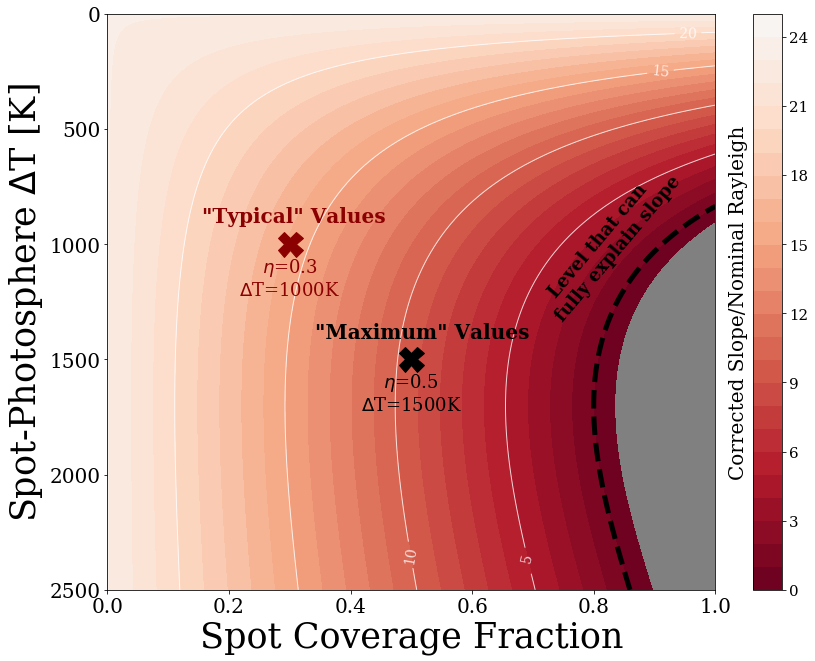

In [49]:
colors1 = plt.cm.RdBu(np.linspace(0.0, 0.5, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)

print np.nanmin(correction)
print np.nanmax(correction)

e,t=np.meshgrid(eta,Ts-Tspot)
levels=np.linspace(0,25,26)
#levels=np.array([0.0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,
#                 0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,
#                 1.05])#,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.0,2.05])

plt.figure(201,figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)

p=plt.contourf(e,t,correction.T,levels=levels,cmap=mymap)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
plt.figtext(0.84,0.55,'Corrected Slope/Nominal Rayleigh',
            fontsize=20,rotation='vertical',va='center')

c=plt.contour(e,t,correction.T,levels=[5,10,15,20,25,30],colors='white',linewidths=1.0,linestyles='-',alpha=0.8)
plt.clabel(c,fontsize=14,colors='white',fmt='%2.0f')

plt.contour(e,t,correction.T,levels=[1.0],colors='black',linewidths=5.0,linestyles='--')
plt.contourf(e,t,correction.T,levels=[-10.0,0.0],colors='grey')

plt.plot(best_scf,Ts-best_tspot,'X',markersize=25,color='darkred')
plt.annotate(r"$\eta$=0.3",xy=(best_scf,(Ts-best_tspot)+100),
             color='darkred',fontsize=18,ha='center',va='center')
plt.annotate(r"$\Delta$T=1000K",xy=(best_scf,(Ts-best_tspot)+200),
             color='darkred',fontsize=18,ha='center',va='center')
plt.figtext(0.23,0.66, '"Typical" Values',fontsize=20,color='darkred',weight='bold')


plt.plot(max_scf,Ts-max_tspot,'X',markersize=25,color='black')
plt.annotate(r"$\eta$=0.5",xy=(max_scf,(Ts-max_tspot)+100),
             color='black',fontsize=18,ha='center',va='center')
plt.annotate(r"$\Delta$T=1500K",xy=(max_scf,(Ts-max_tspot)+200),
             color='black',fontsize=18,ha='center',va='center')

plt.figtext(0.36,0.50, '"Maximum" Values',fontsize=20,color='black',weight='bold')

plt.figtext(0.70,0.63,'Level that can \n fully explain slope',
            fontsize=18,color='black',va='center',ha='center',rotation=50,weight='bold')

plt.ylabel('Spot-Photosphere $\Delta$T [K]', fontsize=35)
plt.yticks(fontsize=20)
plt.ylim(Ts-np.nanmin(Tspot),Ts-np.nanmax(Tspot))

plt.xlabel('Spot Coverage Fraction', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'UnoccultedSpotCorrection.eps')
plt.show()

In [50]:
SAVEPATH=SAVEPATH1
width=400
width2=400

albedo=0.0
mu=2.3
alpha=-4.

wav_fit=np.linspace(4000,9000,100)

# #####################
# import sys
# sys.path.insert(0,SAVEPATH) 
# from SystemCons import *

# #Loaded from SystemCons
# # Rs * Rsun
# # rp/rs
# # mp *Mjup
# # per in days
# # smacm, sma/Rs
# # Grav in cgs
# mh=1.67*10**-24  #mass of hydrogen, grams
# kb=1.38*10**-16  #boltzmann constant,erg/K

# g_planet=Grav*(mp*Mjup)/(rp*Rs)**2.  #cm/s^2
# T_eq=Ts*(1-albedo)**(0.25)*np.sqrt(Rs/(2*smacm))

# nom_ray_slope=alpha*(1./Rs)*(kb*T_eq)/(mu*mh*g_planet)
# ind=np.argmin(np.abs(wav_fit-relw))
# nom_ray_int=ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
# nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int

# ###################
# time0=24.*np.load(SAVEPATH1+'Obs_times.npz')['times']
# n_exp=len(time0)

# bin_ctr=np.load(SAVEPATH+'Binned_Data_'+str(int(width))+'.npz')['bin_centers']
# n_bins=len(bin_ctr)

# rp_fit=np.empty([n_bins])*np.nan
# rp_err=np.empty([n_bins,2])*np.nan

# for b in range(0,len(bin_ctr)):
#     mcmc=np.load(SAVEPATH+'Fits_'+str(int(width))+'/LightCurve_fits_'+str(int(bin_ctr[b]))+'.npz')
#     rp_fit[b]=(mcmc['params'])[2]
#     rp_err[b,:]=(mcmc['paramserr'])[0,:]
#     del mcmc

# rp_err=np.nanmedian(rp_err,axis=1)

# ray_fit_params,ray_fit_cov=np.polyfit(np.log10(bin_ctr),rp_fit,1,w=1./rp_err,cov=True)

# ray_fit=np.poly1d(ray_fit_params)(np.log10(wav_fit))
# ###################
# time0_2=24.*np.load(SAVEPATH2+'Obs_times.npz')['times']
# n_exp_2=len(time0_2)

# bin_ctr_2=np.load(SAVEPATH2+'Binned_Data_'+str(int(width2))+'.npz')['bin_centers']
# n_bins_2=len(bin_ctr_2)

# rp_fit_2=np.empty([n_bins_2])*np.nan
# rp_err_2=np.empty([n_bins_2,2])*np.nan

# for b in range(0,len(bin_ctr_2)):
#     mcmc=np.load(SAVEPATH2+'Fits_'+str(int(width2))+'/LightCurve_fits_'+str(int(bin_ctr_2[b]))+'.npz')
#     rp_fit_2[b]=(mcmc['params'])[2]
#     rp_err_2[b,:]=(mcmc['paramserr'])[0,:]
#     del mcmc

# rp_err_2=np.nanmedian(rp_err_2,axis=1)

# ray_fit_params_2,ray_fit_cov_2=np.polyfit(np.log10(bin_ctr_2),rp_fit_2,1,w=1./rp_err_2,cov=True)

# ray_fit_2=np.poly1d(ray_fit_params_2)(np.log10(wav_fit))
##############
ind=np.argmin(np.abs(wav_fit-4500))

best_scf=0.3
best_tspot=Ts-1000.

def contrast(lamb,Tspot,Tstar):
    #lamb in Angstrom
    lamb=np.copy(lamb*10**-8.)
    h=6.626*10**-27 #planck constant, erg*s
    c=2.9979*10**10 #speed of light, cm/s
    kb=1.38*10**-16 #boltzmann constant, erg/K
    hc=h*c
    return (np.exp(hc/(lamb*kb*Tstar))-1.)/(np.exp(hc/(lamb*kb*Tspot))-1.)

def unocc_corr(eta,in_dat,Tspot,Tstar):
    #eta=spot coverage fraction
    sig=5.67*10**-5  #stefan-boltzman, erg/cm2/K4/s
    out_dat=np.empty([len(in_dat)])
    for l in range(0,len(wav_fit)):
        con=contrast(wav_fit[l],Tspot,Tstar)
        corr=(1./(1.-eta*(1-con)))
        out_dat[l]=in_dat[l]/corr
    corr_slope=(np.polyfit(np.log10(wav_fit),out_dat,1))[0]
    return corr_slope
    
eta=np.linspace(0.0,1.0,200.)
Tspot=np.linspace(Ts-2500.,Ts,100.)

print unocc_corr(0.3,np.copy(NIGHT1_rpfit),Ts-500,Ts)
print NIGHT1_slope,NIGHT2_slope

correction=np.empty([len(eta),len(Tspot)])*np.nan
for e in range(0,len(eta)):
    for t in range(0,len(Tspot)):
        correction[e,t]=unocc_corr(eta[e],np.copy(NIGHT1_rpfit),Tspot[t],Ts)/NIGHT2_slope


best_corr=unocc_corr(best_scf,np.copy(NIGHT1_rpfit),best_tspot,Ts)/NIGHT2_slope
max_corr=unocc_corr(max_scf,np.copy(NIGHT1_rpfit),max_tspot,Ts)/NIGHT2_slope

print '*************************'
print 'CORRECTED/NIGHT2 (BEST)', best_corr
print 'CORRECTED/NIGHT2 (MAX)', max_corr
print '*************************'
##################


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:102: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


-0.09678445489764184
-0.146201263081563 -0.07803455910026814
*************************
CORRECTED/NIGHT2 (BEST) 1.0678005576965095
CORRECTED/NIGHT2 (MAX) 0.6338893457293401
*************************


-0.3054280706853603
1.5579330711561945


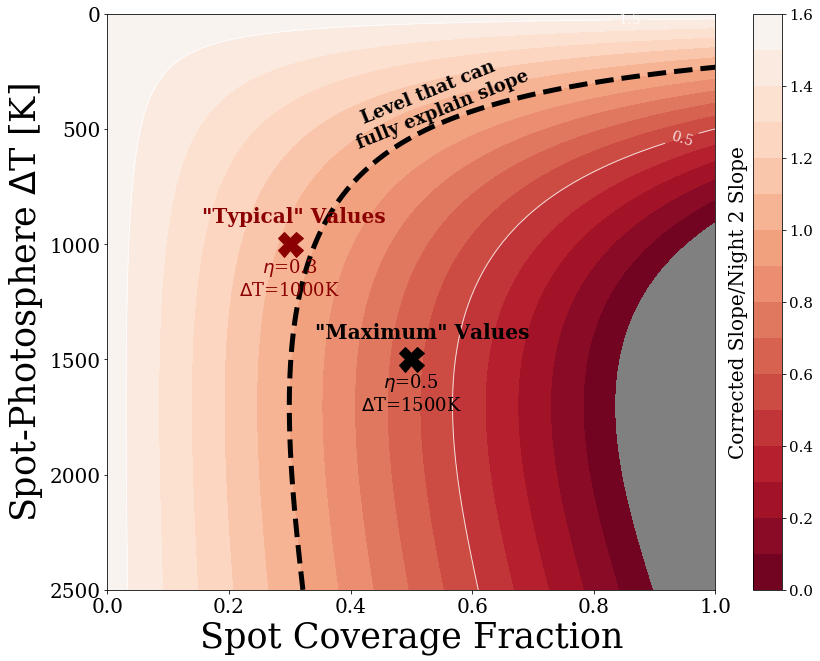

In [56]:
colors1 = plt.cm.RdBu(np.linspace(0.0, 0.5, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)

print np.nanmin(correction)
print np.nanmax(correction)

e,t=np.meshgrid(eta,Ts-Tspot)
levels=np.linspace(0,1.6,17)
#levels=np.array([0.0,0.05,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,
#                 0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,
#                 1.05])#,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.0,2.05])

plt.figure(201,figsize=(12,10))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)

p=plt.contourf(e,t,correction.T,levels=levels,cmap=mymap)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
plt.figtext(0.84,0.55,'Corrected Slope/Night 2 Slope',
            fontsize=20,rotation='vertical',va='center')

c=plt.contour(e,t,correction.T,levels=[0.5,1.5,2.0,2.5,3.0],colors='white',linewidths=1.0,linestyles='-',alpha=0.8)
plt.clabel(c,fontsize=14,colors='white',fmt='%2.1f')

plt.contour(e,t,correction.T,levels=[1.0],colors='black',linewidths=5.0,linestyles='--')
plt.contourf(e,t,correction.T,levels=[-5.0,0.0],colors='grey')

plt.plot(best_scf,Ts-best_tspot,'X',markersize=25,color='darkred')
plt.annotate(r"$\eta$=0.3",xy=(best_scf,(Ts-best_tspot)+100),
             color='darkred',fontsize=18,ha='center',va='center')
plt.annotate(r"$\Delta$T=1000K",xy=(best_scf,(Ts-best_tspot)+200),
             color='darkred',fontsize=18,ha='center',va='center')
plt.figtext(0.23,0.66, '"Typical" Values',fontsize=20,color='darkred',weight='bold')


plt.plot(0.5,1500.,'X',markersize=25,color='black')
plt.annotate(r"$\eta$=0.5",xy=(0.5,(1500.)+100),
             color='black',fontsize=18,ha='center',va='center')
plt.annotate(r"$\Delta$T=1500K",xy=(0.5,(1500.)+200),
             color='black',fontsize=18,ha='center',va='center')

plt.figtext(0.36,0.50, '"Maximum" Values',fontsize=20,color='black',weight='bold')

plt.figtext(0.5,0.83,'Level that can \n fully explain slope',
            fontsize=18,color='black',va='center',ha='center',rotation=22,weight='bold')

plt.ylabel('Spot-Photosphere $\Delta$T [K]', fontsize=35)
plt.yticks(fontsize=20)
plt.ylim(Ts-np.nanmin(Tspot),Ts-np.nanmax(Tspot))

plt.xlabel('Spot Coverage Fraction', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'UnoccultedSpotCorrection_night1vsnight2.eps')
plt.show()





In [52]:
print contrast(6000,Ts-1500,Ts)
print (Ts-1500.)/Ts

0.21700718163162058
0.73586899102


In [56]:
print NIGHT1_bins
print NIGHT2_bins

[5100. 5300. 5500. 5700. 5900. 6100. 6300. 6500. 6700. 6900. 7100.]
[5200. 5600. 6000. 6400. 6800. 7200. 7600. 8000. 8400. 8800. 9200.]


In [59]:
act=corr_ray_fit_params[0]
act_e=np.sqrt(np.diag(corr_ray_fit_cov))[0]
print act,act_e
print act/nom_ray_slope
print '*****'
print act_e/np.abs(act)
print (np.abs(act)-act_e)/np.abs(act)
print (np.abs(act)+act_e)/np.abs(act)

-0.023281373613347398 0.0055663052878848675
4.416477073480906
*****
0.23908835364824266
0.7609116463517575
1.2390883536482427


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


0.010914616197518026
0.1023245268517315


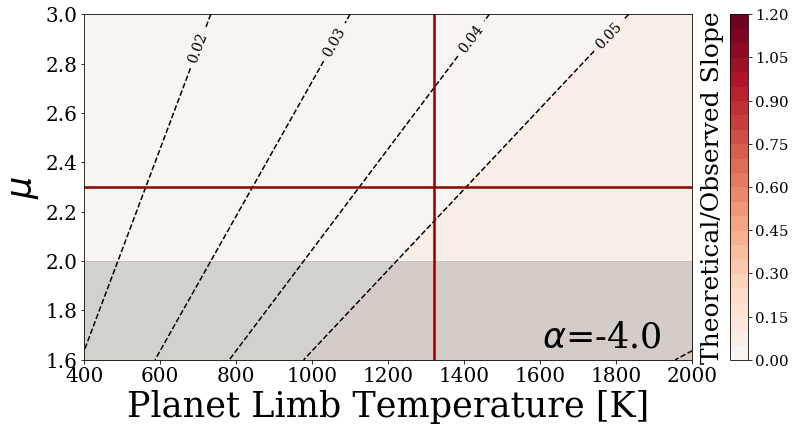

In [84]:
def RaySlope(a,T,mu,Mp,Rp,Rs):
    g=Grav*(mp*Mjup)/(rp*Rs)**2.
    return a*(1./Rs)*(kb*T)/(mu*mh*g)

#nom=RaySlope(-4.,T_eq,2.3,mp,rp,Rs)
nom=nom_ray_slope
act=wSlope

T_arr=np.linspace(400.,2000.,300.)
mu_arr=np.linspace(1.6,3.0,100.)
con_alpha=np.empty([len(T_arr),len(mu_arr)])*np.nan
for t in range(0,len(T_arr)):
    con_alpha[t,:]=RaySlope(-4.,T_arr[t],mu_arr,mp,rp,Rs)
    
con_alpha/=act
####
colors1 = plt.cm.RdBu_r(np.linspace(0.5, 1.0, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)
####
print np.nanmin(con_alpha)
print np.nanmax(con_alpha)

T_g,mu_g=np.meshgrid(T_arr,mu_arr)
levels=np.linspace(0.0,1.2,25)

plt.figure(160,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)


p=plt.contourf(T_g,mu_g,con_alpha.T,cmap=mymap,levels=levels)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
c=plt.contour(T_g,mu_g,con_alpha.T,levels=np.array([0.0,0.01,0.02,0.03,0.04,0.05,0.1,0.15,0.20,0.25,0.3]),colors='black',linestyles='--')
plt.clabel(c,fontsize=14,colors='black',fmt='%2.2f')
plt.figtext(0.834,0.55,'Theoretical/Observed Slope',fontsize=25,rotation='vertical',va='center')

plt.figtext(0.65,0.18,'$\\alpha$=-4.0',color='black',fontsize=35)

plt.axhline(y=2.3,color='darkred',linewidth=2.5)
plt.axvline(x=1321,color='darkred',linewidth=2.5)

plt.fill_between([400,2000],1.6,2.0,color='grey',alpha=0.3)



plt.ylabel('$\mu$', fontsize=35)
plt.yticks(fontsize=20)

plt.xlabel('Planet Limb Temperature [K]', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'slopes_con_alpha.pdf')


In [85]:
print -4.*act/nom_ray_slope
print RaySlope(-4.*act/nom_ray_slope,T_eq,2.3,mp,rp,Rs)/act

-85.07508054863506
0.9999999999999999


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


1.0677341932354594


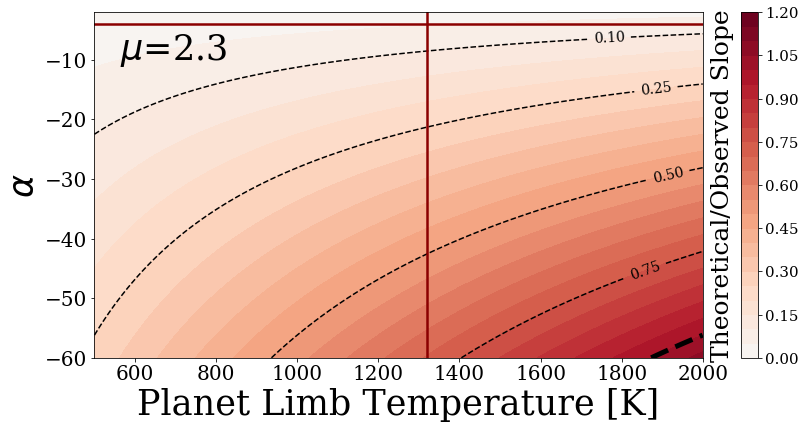

In [86]:
T_arr=np.linspace(500.,2000.,300.)
alph_arr=np.linspace(-2,-60,100.)
con_arr=np.empty([len(T_arr),len(alph_arr)])*np.nan
for t in range(0,len(T_arr)):
    con_arr[t,:]=RaySlope(alph_arr,T_arr[t],2.3,mp,rp,Rs)
    
con_arr/=act
####
colors1 = plt.cm.RdBu_r(np.linspace(0.5, 1.0, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)
####
print np.nanmax(con_arr)

T_g,a_g=np.meshgrid(T_arr,alph_arr)
levels=np.linspace(0.0,1.2,25)

plt.figure(160,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)


p=plt.contourf(T_g,a_g,con_arr.T,cmap=mymap,levels=levels)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
plt.figtext(0.834,0.55,'Theoretical/Observed Slope',fontsize=25,rotation='vertical',va='center')

plt.contour(T_g,a_g,con_arr.T,colors='black',linewidths=5.0,linestyles='--',levels=[1.0])
c=plt.contour(T_g,a_g,con_arr.T,levels=np.array([0.0,0.1,0.25,0.5,0.75,1.25,1.5,1.75,2.0,2.25,2.5,3.0,3.5,4.0,4.5,5.0]),colors='black',linestyles='--')
plt.clabel(c,fontsize=14,colors='black',fmt='%2.2f')

plt.figtext(0.15,0.84,'$\mu$=2.3',color='black',fontsize=35)

plt.axhline(y=-4.0,color='darkred',linewidth=2.5)
plt.axvline(x=1321,color='darkred',linewidth=2.5)



plt.ylabel('$\\alpha$', fontsize=35)
plt.yticks(fontsize=20)

plt.xlabel('Planet Limb Temperature [K]', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'slopes_con_mu.pdf')


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


1.0138103830615037


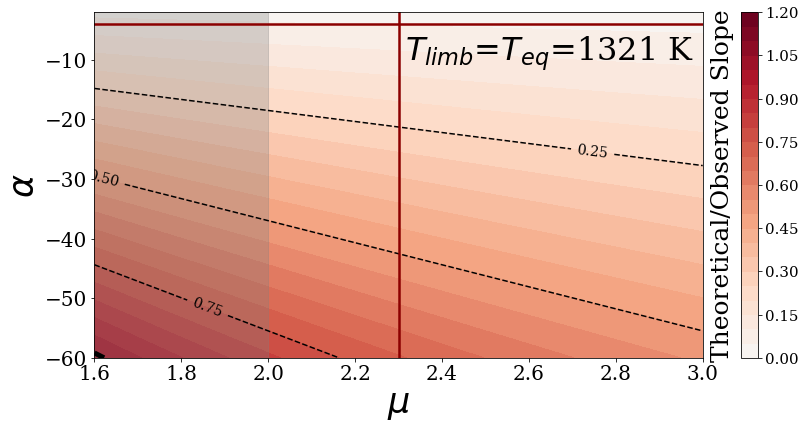

In [87]:
mu_arr=np.linspace(1.6,3.0,200.)
alph_arr=np.linspace(-2,-60,100.)
con_arr=np.empty([len(mu_arr),len(alph_arr)])*np.nan
for t in range(0,len(mu_arr)):
    con_arr[t,:]=RaySlope(alph_arr,T_eq,mu_arr[t],mp,rp,Rs)
    
con_arr/=act
####
colors1 = plt.cm.RdBu_r(np.linspace(0.5, 1.0, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)
####
print np.nanmax(con_arr)

m_g,a_g=np.meshgrid(mu_arr,alph_arr)
levels=np.linspace(0.0,1.2,25)

plt.figure(160,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)


p=plt.contourf(m_g,a_g,con_arr.T,cmap=mymap,levels=levels)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
c=plt.contour(m_g,a_g,con_arr.T,levels=np.array([0.0,0.25,0.5,0.75,1.25,1.5,1.75,2.0,2.25,2.5,3.0,3.5,4.0,4.5]),colors='black',linestyles='--')
plt.clabel(c,fontsize=14,colors='black',fmt='%2.2f')

plt.figtext(0.834,0.55,'Theoretical/Observed Slope',fontsize=25,rotation='vertical',va='center')

plt.contour(m_g,a_g,con_arr.T,colors='black',linewidths=5.0,linestyles='--',levels=[1.0])

plt.figtext(0.48,0.84,'$T_{limb}$=$T_{eq}$=1321 K',color='black',fontsize=32)

plt.axhline(y=-4.0,color='darkred',linewidth=2.5)
plt.axvline(x=2.3,color='darkred',linewidth=2.5)

plt.fill_between([1.6,2.0],-60,-2,color='grey',alpha=0.3)


plt.ylabel('$\\alpha$', fontsize=35)
plt.yticks(fontsize=20)

plt.xlabel('$\mu$', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'slopes_con_Teq.pdf')


# Including Clouds

-0.11211791109091557
0.33255471226812733
**************
0.33255471226812733
SLOPE: -0.03728533966294291
**************


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


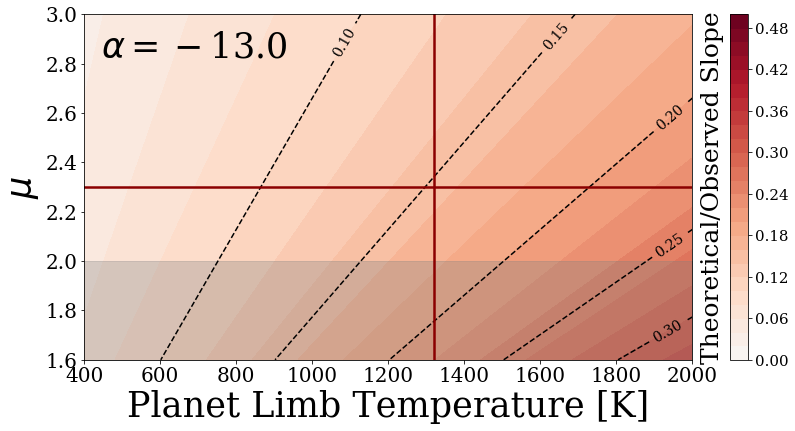

In [106]:
def RaySlope(a,T,mu,Mp,Rp,Rs):
    g=Grav*(mp*Mjup)/(rp*Rs)**2.
    return a*(1./Rs)*(kb*T)/(mu*mh*g)

slope=-13.

nom=RaySlope(-4.,T_eq,2.3,mp,rp,Rs)
act=wSlope
print act

T_arr=np.linspace(400.,2000.,300.)
mu_arr=np.linspace(1.6,3.0,100.)
con_alpha=np.empty([len(T_arr),len(mu_arr)])*np.nan
for t in range(0,len(T_arr)):
    con_alpha[t,:]=RaySlope(slope,T_arr[t],mu_arr,mp,rp,Rs)
    
con_alpha/=act
####
colors1 = plt.cm.RdBu_r(np.linspace(0.5, 1.0, 128))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors1)
####
print np.nanmax(con_alpha)

print '**************'
print np.nanmax(con_alpha)
print 'SLOPE:', np.nanmax(con_alpha)*act
print '**************'

T_g,mu_g=np.meshgrid(T_arr,mu_arr)
levels=np.linspace(0.0,0.5,26)

plt.figure(160,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=1.0)


p=plt.contourf(T_g,mu_g,con_alpha.T,cmap=mymap,levels=levels)
cbar=plt.colorbar(p)
cbar.ax.tick_params(labelsize=15) 
c=plt.contour(T_g,mu_g,con_alpha.T,levels=np.array([0.0,0.1,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]),colors='black',linestyles='--')
plt.clabel(c,fontsize=14,colors='black',fmt='%2.2f')

plt.contour(T_g,mu_g,con_alpha.T,colors='black',linewidths=5.0,linestyles='--',levels=[1.0])


plt.figtext(0.834,0.55,'Theoretical/Observed Slope',fontsize=25,rotation='vertical',va='center')

plt.figtext(0.14,0.85,'$\\alpha=-$13.0',color='black',fontsize=35)

plt.axhline(y=2.3,color='darkred',linewidth=2.5)
plt.axvline(x=1321,color='darkred',linewidth=2.5)

plt.fill_between([400,2000],1.6,2.0,color='grey',alpha=0.3)


plt.ylabel('$\mu$', fontsize=35)
plt.yticks(fontsize=20)

plt.xlabel('Planet Limb Temperature [K]', fontsize=35)
plt.xticks(fontsize=20)

plt.savefig(figpath+'slopes_CLOUDS.pdf')



In [192]:
bw1=200
bw2=400

#bin_widths=np.array([600,500,400,300,200])#,50,25,20])
#rmse_avg1=np.zeros_like(bin_widths)*np.nan
#phtn_lev1=np.zeros_like(bin_widths)*np.nan

###NIGHT1####
#bins=np.load(SAVEPATH1+'LC_bins_br_'+str(int(bw1))+'.npz')['bin_ctr']
#print '**********', bw1, '**********'
print len(NIGHT1_bins), len(NIGHT1_RP), len(NIGHT1_rerr), len(NIGHT1_c1), len(NIGHT1_c1_err),len(NIGHT1_c2),len(NIGHT1_c2_err)

for b in range(0,len(NIGHT1_bins)):
    LC_fit=np.load(SAVEPATH1+'Fits_'+str(int(bw1))+
                   '/LightCurve_fits_width'+str(int(bw1))
                   +'_bin'+str(int(NIGHT1_bins[b]))+'.npz')['lightcurve_fit']
    data_lc=(np.load(SAVEPATH1+'LC_bins_br_'+str(int(bw1))+'.npz')['data'])[:,b]
    #counts=(np.load(SAVEPATH+'Binned_Data_'+str(int(bin_widths[bw]))+'.npz')['bin_counts'])[0,:,b]
    rmse_avg1_s=np.sqrt(np.nansum((LC_fit-data_lc)**2.)/len(LC_fit))
    phtn_lev1_s=np.nanmedian(np.load(SAVEPATH1+'LC_bins_br_'+str(int(bw1))+'.npz')['err_p'][:,b])/np.sqrt(len(LC_fit))
   # print data_lc-LC_fit
   # print phtn_lev1
    chi2=(np.nansum((data_lc-LC_fit)**2./((np.load(SAVEPATH1+'LC_bins_br_'+str(int(bw1))+'.npz')['err_p'][:,b])/np.sqrt(len(LC_fit)))**2.))/(len(LC_fit)-3.)
    #print phtn_lev1_s.shape
    print np.int(NIGHT1_bins[b]),'$\AA$ &', np.round(NIGHT1_RP[b],4),'&',np.round(NIGHT1_rerr[b],4),'&',np.round(NIGHT1_c1[b],3),'&',np.round(NIGHT1_c1_err[b],3),'&',np.round(NIGHT1_c2[b],3),'&',np.round(NIGHT1_c2_err[b],3),'&',np.round(rmse_avg1_s*10**6.,2),'&',np.round(phtn_lev1_s*10**6.,2),'&',np.round(rmse_avg1_s/phtn_lev1_s,2),'&',chi2
    
    
print '--------------------'
for b in range(0,len(NIGHT2_bins)):
    LC_fit=np.load(SAVEPATH2+'Fits_'+str(int(bw2))+
                   '/LightCurve_fits_width'+str(int(bw2))
                   +'_bin'+str(int(NIGHT2_bins[b]))+'.npz')['lightcurve_fit']
    data_lc=(np.load(SAVEPATH2+'LC_bins_br_'+str(int(bw2))+'.npz')['data'])[:,b]
    #counts=(np.load(SAVEPATH+'Binned_Data_'+str(int(bin_widths[bw]))+'.npz')['bin_counts'])[0,:,b]
    rmse_avg1_s=np.sqrt(np.nansum((LC_fit-data_lc)**2.)/len(LC_fit))
    phtn_lev1_s=np.nanmedian(np.load(SAVEPATH2+'LC_bins_br_'+str(int(bw2))+'.npz')['err_p'][:,b])/np.sqrt(len(LC_fit))
    #print phtn_lev1_s.shape
    print np.int(NIGHT2_bins[b]),'$\AA$ &', np.round(NIGHT2_RP[b],4),'&',np.round(NIGHT2_rerr[b],4),'&',np.round(NIGHT2_c1[b],3),'&',np.round(NIGHT2_c1_err[b],3),'&',np.round(NIGHT2_c2[b],3),'&',np.round(NIGHT2_c2_err[b],3),'&',np.round(rmse_avg1_s*10**6.,2),'&',np.round(phtn_lev1_s*10**6.,2),'&',np.round(rmse_avg1_s/phtn_lev1_s,2)
    
#rmse_avg1[bw]=(rmse_avg1_s)
#phtn_lev1[bw]=np.nanmedian(phtn_lev1_s)/np.sqrt(len(LC_fit))
#print bin_widths[bw], np.round(rmse_avg1[bw],6)*10**6., np.round(phtn_lev1[bw],6)*10**6.,np.round(rmse_avg1[bw]/phtn_lev1[bw],6)

#sqrN=1/np.sqrt(bin_widths)*10**6.
####################


# print '***** night1 RP *****'
# for b in range(0,len(NIGHT1_bins)):
#     print NIGHT1_bins[b], '     ', np.round(NIGHT1_RP[b],5), '     ', np.round(NIGHT1_rerr[b],5)
# print '***** night1 c1 *****'
# for b in range(0,len(NIGHT1_bins)):
#     print NIGHT1_bins[b], '     ', np.round(NIGHT1_c1[b],3), '     ', np.round(NIGHT1_c1_err[b],3)
# print '***** night1 c2 *****'
# for b in range(0,len(NIGHT1_bins)):
#     print NIGHT1_bins[b], '     ', np.round(NIGHT1_c2[b],3), '     ', np.round(NIGHT1_c2_err[b],3)
# print '----------------------------------------------------------------'    
# print '***** night2 RP *****'
# for b in range(0,len(NIGHT2_bins)):
#     print NIGHT2_bins[b], '     ', np.round(NIGHT2_RP[b],5), '     ', np.round(NIGHT2_rerr[b],5)
# print '***** night2 c1 *****'
# for b in range(0,len(NIGHT2_bins)):
#     print NIGHT2_bins[b], '     ', np.round(NIGHT2_c1[b+1],3), '     ', np.round(NIGHT2_c1_err[b+1],3)
# print '***** night2 c2 *****'
# for b in range(0,len(NIGHT2_bins)):
#     print NIGHT2_bins[b], '     ', np.round(NIGHT2_c2[b+1],3), '     ', np.round(NIGHT2_c2_err[b+1],3)
# # print '----------------------------------------------------------------'    
# print '***** COMBINED RP *****'
# for b in range(0,len(NIGHT2_bins)):
#     print NIGHT2_bins[b], '     ', np.round(COM_RP[b],5), '     ', np.round(COM_RE[b],5)

11 11 11 11 11 11 11
5100 $\AA$ & 0.0824 & 0.0031 & 0.723 & 0.038 & 0.235 & 0.03 & 2373.65 & 1219.24 & 1.95 & 3.9432277269103637
5300 $\AA$ & 0.086 & 0.002 & 0.693 & 0.029 & 0.268 & 0.015 & 1651.75 & 1135.83 & 1.45 & 2.1934664317196537
5500 $\AA$ & 0.0801 & 0.0031 & 0.623 & 0.047 & 0.268 & 0.045 & 1761.51 & 1085.15 & 1.62 & 2.7229059095026575
5700 $\AA$ & 0.0794 & 0.0029 & 0.611 & 0.041 & 0.289 & 0.029 & 1572.61 & 1058.25 & 1.49 & 2.280571454413572
5900 $\AA$ & 0.0801 & 0.0034 & 0.534 & 0.073 & 0.267 & 0.053 & 1297.26 & 1033.11 & 1.26 & 1.6044555358676653
6100 $\AA$ & 0.0684 & 0.0029 & 0.531 & 0.064 & 0.28 & 0.053 & 1277.48 & 1023.8 & 1.25 & 1.6107013092851117
6300 $\AA$ & 0.0712 & 0.0034 & 0.43 & 0.065 & 0.214 & 0.066 & 1475.78 & 1016.53 & 1.45 & 2.1793454705796003
6500 $\AA$ & 0.0665 & 0.0028 & 0.385 & 0.06 & 0.18 & 0.043 & 1083.74 & 1015.26 & 1.07 & 1.1670187585709033
6700 $\AA$ & 0.0705 & 0.002 & 0.371 & 0.053 & 0.192 & 0.046 & 783.24 & 1001.75 & 0.78 & 0.6337483518957744
6900 $\AA

In [125]:
a=corr_ray_fit_params[0]
b=ray_fit_params[0]
c=nom_ray_slope

print a
print b
print c

print b/c
print a/c
print b/a


-0.07954375058492372
-0.18168756030056185
-0.005271480690603443
34.466134083432166
15.089451190955248
2.2841211152922165


# Corrected TSpec 

SLOPE [-0.08835535  0.38253706]


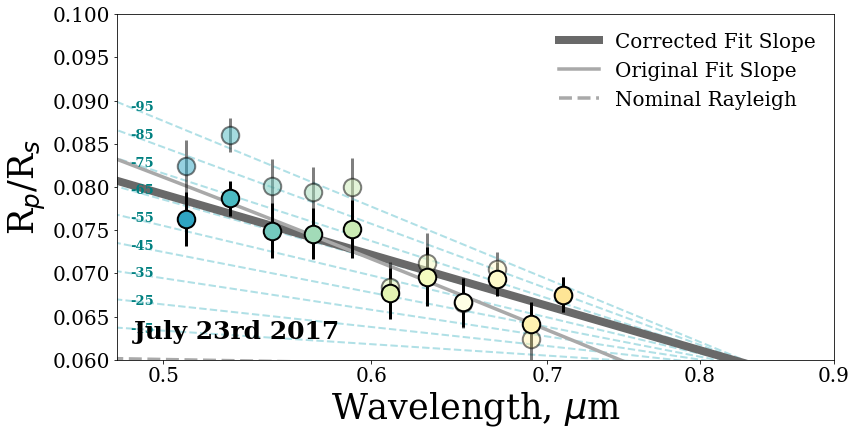

In [336]:
Tspot=Ts-1500.
scf=0.4

SAVEPATH=SAVEPATH1
width=400

albedo=0.0
mu=2.3
alpha=-4.

wav_fit=np.linspace(4000,9000,100)

def contrast(lamb,Tspot,Tstar):
    #lamb in Angstrom
    lamb=np.copy(lamb*10**-8.)
    h=6.626*10**-27 #planck constant, erg*s
    c=2.9979*10**10 #speed of light, cm/s
    kb=1.38*10**-16 #boltzmann constant, erg/K
    hc=h*c
    return (np.exp(hc/(lamb*kb*Tstar))-1.)/(np.exp(hc/(lamb*kb*Tspot))-1.)

def unocc_corr(eta,in_dat,in_wav,Tspot,Tstar):
    #eta=spot coverage fraction
    sig=5.67*10**-5  #stefan-boltzman, erg/cm2/K4/s
    out_dat=np.empty([len(in_dat)])
    for l in range(0,len(in_wav)):
        con=contrast(wav_fit[l],Tspot,Tstar)
        corr=(1./(1.-eta*(1-con)))
        out_dat[l]=in_dat[l]/corr
    return out_dat


corr_rpfit=unocc_corr(scf,NIGHT1_RP,NIGHT1_bins,Tspot,Ts)


#######################
corr_ray_fit_params,corr_ray_fit_cov=np.polyfit(np.log10(NIGHT1_bins),corr_rpfit,1,w=1./NIGHT1_rerr,cov=True)

corr_ray_fit=np.poly1d(corr_ray_fit_params)(np.log10(wav_fit))
print 'SLOPE', corr_ray_fit_params
#######################
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))    
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
################

nom_ray_slope=nom_ray_slope
ind=np.argmin(np.abs(wav_fit-relw))
nom_ray_int=corr_ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int

ind=np.argmin(np.abs(NIGHT1_bins-relw))
norm=NIGHT1_RP[ind]-corr_rpfit[ind]

ind=np.argmin(np.abs(wav_fit-relw))
alph_arr=np.array([-15,-25,-35,-45,-55,-65,-75,-85,-95])
ray_alph=np.empty([len(wav_fit),len(alph_arr)])
for a in range(0,len(alph_arr)):
    al=alph_arr[a]
    nrs=al*nom_ray_slope/-4.
    nri=corr_ray_fit[ind]-nrs*np.log10(wav_fit[ind])
    ray_alph[:,a]=nrs*np.log10(wav_fit)+nri

plt.figure(150,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.95)

plt.plot(np.log10(wav_fit),corr_ray_fit+norm,'-',color='dimgrey',linewidth=8.0,zorder=1,label='Corrected Fit Slope')
plt.plot(np.log10(wav_fit),NIGHT1_rpfit,'-',color='darkgrey',linewidth=3.5,zorder=1,label='Original Fit Slope')
plt.plot(np.log10(wav_fit),nom_ray+norm,'--',color='darkgrey',linewidth=3.5,zorder=1,label='Nominal Rayleigh')

for a in range(0,len(alph_arr)):
    plt.plot(np.log10(wav_fit),ray_alph[:,a]+norm,'--',color='powderblue',linewidth=2.0,zorder=0)
    ind=np.argmin(np.abs(wav_fit-4850))
    plt.annotate(alph_arr[a],xy=(np.log10(wav_fit[ind]),ray_alph[ind,a]+norm),
                 color='teal',fontsize=13,va='center',weight='bold')    

for b in range(0,len(NIGHT1_bins)):
    plt.errorbar(np.log10(NIGHT1_bins[b]),NIGHT1_RP[b],yerr=NIGHT1_rerr[b],color='black',elinewidth=3.0,
                 capsize=0.0,capthick=2.0,zorder=11,alpha=0.5)
    plt.plot(np.log10(NIGHT1_bins[b]),NIGHT1_RP[b],'.',markerfacecolor=scal_m.to_rgba(NIGHT1_bins[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12,alpha=0.5)
    
for b in range(0,len(NIGHT1_bins)):
    plt.errorbar(np.log10(NIGHT1_bins[b]),corr_rpfit[b]+norm,yerr=NIGHT1_rerr[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
    plt.plot(np.log10(NIGHT1_bins[b]),corr_rpfit[b]+norm,'.',markerfacecolor=scal_m.to_rgba(NIGHT1_bins[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
    
# plt.axvline(x=np.log10(5890),linestyle='--',color=scal_m.to_rgba(5890),zorder=0)
# plt.axvline(x=np.log10(7665),linestyle='--',color=scal_m.to_rgba(7665),zorder=0)

plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=20)
plt.xlim(np.log10(4800),np.log10(9000))
plt.xlabel('Wavelength, $\mu$m',fontsize=35)

plt.yticks(fontsize=20)
plt.ylim(0.06,0.1)
plt.ylabel('R$_p$/R$_s$',fontsize=35)

plt.legend(loc='upper right',fontsize=20,frameon=False)
plt.figtext(0.14,0.2,'July 23rd 2017',color='black',ha='left',fontsize=25,weight='bold')


plt.savefig(figpath+'CORR_Tspec_night1.pdf')
plt.show()

# Averaged TSpec

In [55]:
def ComNights(x,dx,y,dy):
    d=np.zeros_like(x)
    dd=np.zeros_like(x)
    for i in range(0,len(d)):
        d[i]=np.nansum([x[i]/dx[i]**2.,y[i]/dy[i]**2.])/np.nansum([1./dx[i]**2.,1./dy[i]**2.])
        dd[i]=np.sqrt(1./np.nansum([1./dx[i]**2.,1./dy[i]**2.]))
    return d,dd

# Rayleigh Params Plot

******************
 NIGHT 1 ALONE
SLOPE -0.03170358357782154
SLOPE/ray 6.014170484269067
SLOPE ERROR 0.010850584020041827
******************
[0.03846774 0.03973218 0.03750582 0.03473955 0.03523202 0.03365553
 0.03521084 0.03581487 0.03612758 0.03343045 0.03442299]
[       nan 0.08142775 0.07817935 0.07652688 0.07624715 0.07453393
        nan 0.07217185 0.07304257 0.07308409 0.06945215]
11 11 11
******************
 COMBINED 
SLOPE -0.023281373613347398
SLOPE/RAY  4.416477073480906
SLOPE ERROR 0.0055663052878848675
******************


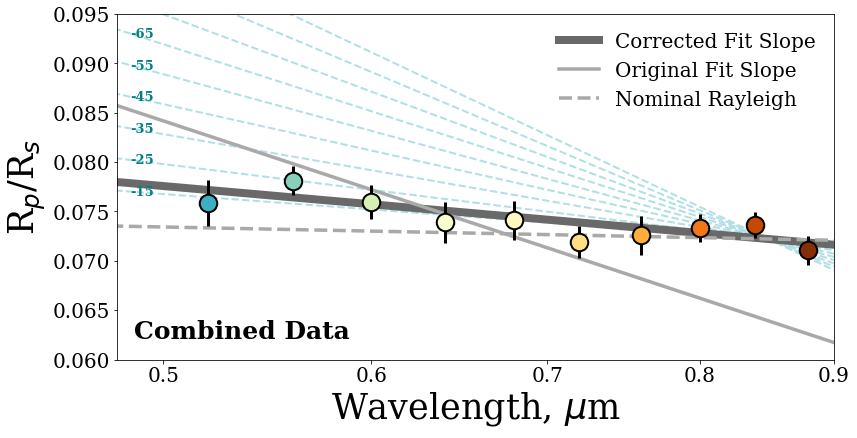

In [58]:
Tspot=Ts-1500.
scf=0.6

SAVEPATH=SAVEPATH1
width=400
width2=400

albedo=0.0
mu=2.3
alpha=-4.

relw=8500

wav_fit=np.linspace(4000,9000,100)

###########################

def contrast(lamb,Tspot,Tstar):
    #lamb in Angstrom
    lamb=np.copy(lamb*10**-8.)
    h=6.626*10**-27 #planck constant, erg*s
    c=2.9979*10**10 #speed of light, cm/s
    kb=1.38*10**-16 #boltzmann constant, erg/K
    hc=h*c
    return (np.exp(hc/(lamb*kb*Tstar))-1.)/(np.exp(hc/(lamb*kb*Tspot))-1.)

def unocc_corr(eta,in_dat,in_wav,Tspot,Tstar):
    #eta=spot coverage fraction
    sig=5.67*10**-5  #stefan-boltzman, erg/cm2/K4/s
    out_dat=np.empty([len(in_dat)])
    for l in range(0,len(in_wav)):
        con=contrast(wav_fit[l],Tspot,Tstar)
        corr=(1./(1.-eta*(1-con)))
        out_dat[l]=in_dat[l]/corr
    return out_dat


corr_rpfit=unocc_corr(scf,NIGHT1_RP,NIGHT1_bins,Tspot,Ts)


#######################
corr_ray_fit_params,corr_ray_fit_cov=np.polyfit(np.log10(NIGHT1_bins),corr_rpfit,1,w=1./NIGHT1_rerr,cov=True)

corr_ray_fit=np.poly1d(corr_ray_fit_params)(np.log10(wav_fit))
print '******************'
print ' NIGHT 1 ALONE'
print 'SLOPE', corr_ray_fit_params[0]
print 'SLOPE/ray',corr_ray_fit_params[0]/nom_ray_slope
print 'SLOPE ERROR', np.sqrt(np.diag(corr_ray_fit_cov))[0]
print '******************'
#######################
colors1 = plt.cm.YlGnBu_r(np.linspace(0, 1, 128))
colors2 = plt.cm.YlOrBr(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

norm=matplotlib.colors.Normalize(vmin=np.min(wav_fit),vmax=np.max(wav_fit))                                                                                                                 
colors=mymap
scal_m=matplotlib.cm.ScalarMappable(cmap=colors,norm=norm)
scal_m.set_array([])
###############

ind=np.argmin(np.abs(NIGHT1_bins-relw))
norm=NIGHT1_RP[ind]-corr_rpfit[ind]

shift=NIGHT1_RP[ind]-NIGHT2_RP[ind]

##################################
print corr_rpfit
print NIGHT2_RP

NIGHT1_vals_ex=corr_rpfit+norm#np.append(corr_rpfit+norm,np.array([np.nan,np.nan,np.nan,np.nan,np.nan]))
NIGHT1_errs_ex=NIGHT1_rerr#np.append(NIGHT1_rerr,np.array([np.nan,np.nan,np.nan,np.nan,np.nan]))

COM_RP,COM_RE=ComNights(NIGHT1_vals_ex,NIGHT1_errs_ex,NIGHT2_RP+shift,NIGHT2_rerr)

print len(NIGHT2_bins), len(COM_RP), len(COM_RE)
NIGHT2_bins0=NIGHT2_bins[~np.isnan(COM_RP)]
COM_RE0=COM_RE[~np.isnan(COM_RP)]
COM_RP0=COM_RP[~np.isnan(COM_RP)]


##########

corr_ray_fit_params,corr_ray_fit_cov=np.polyfit(np.log10(NIGHT2_bins0),COM_RP0,1,w=1./COM_RE0,cov=True)

corr_ray_fit=np.poly1d(corr_ray_fit_params)(np.log10(wav_fit))
print '******************'
print ' COMBINED '
print 'SLOPE', corr_ray_fit_params[0]
print 'SLOPE/RAY ',corr_ray_fit_params[0]/nom_ray_slope
print 'SLOPE ERROR', np.sqrt(np.diag(corr_ray_fit_cov))[0]
print '******************'


nom_ray_slope=nom_ray_slope
ind=np.argmin(np.abs(wav_fit-relw))
nom_ray_int=corr_ray_fit[ind]-nom_ray_slope*np.log10(wav_fit[ind])
nom_ray=nom_ray_slope*np.log10(wav_fit)+nom_ray_int

############
ind=np.argmin(np.abs(wav_fit-relw))
alph_arr=np.array([-15,-25,-35,-45,-55,-65,-75,-85,-95])
ray_alph=np.empty([len(wav_fit),len(alph_arr)])
for a in range(0,len(alph_arr)):
    al=alph_arr[a]
    nrs=al*nom_ray_slope/-4.
    nri=corr_ray_fit[ind]-nrs*np.log10(wav_fit[ind])
    ray_alph[:,a]=nrs*np.log10(wav_fit)+nri


plt.figure(150,figsize=(12,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.12,right=0.95)

plt.plot(np.log10(wav_fit),corr_ray_fit,'-',color='dimgrey',linewidth=8.0,zorder=1,label='Corrected Fit Slope')
plt.plot(np.log10(wav_fit),NIGHT1_rpfit,'-',color='darkgrey',linewidth=3.5,zorder=1,label='Original Fit Slope')
plt.plot(np.log10(wav_fit),nom_ray,'--',color='darkgrey',linewidth=3.5,zorder=1,label='Nominal Rayleigh')
#plt.axhline(y=ray_fit[ind],linestyle=':',color='lightgrey',linewidth=4.5,zorder=1,label='Flat')

for a in range(0,len(alph_arr)):
    plt.plot(np.log10(wav_fit),ray_alph[:,a],'--',color='powderblue',linewidth=2.0,zorder=0)
    ind=np.argmin(np.abs(wav_fit-4850))
    plt.annotate(alph_arr[a],xy=(np.log10(wav_fit[ind]),ray_alph[ind,a]),
                 color='teal',fontsize=13,va='center',weight='bold')    

# for b in range(0,n_bins):
#     plt.errorbar(np.log10(bin_ctr[b]),rp_fit[b],yerr=rp_err[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
#     plt.plot(np.log10(bin_ctr[b]),rp_fit[b],'.',markerfacecolor=scal_m.to_rgba(bin_ctr[b]),
#              markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
   
for b in range(0,len(NIGHT2_bins)):
    plt.errorbar(np.log10(NIGHT2_bins[b]),COM_RP[b],yerr=COM_RE[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
    plt.plot(np.log10(NIGHT2_bins[b]),COM_RP[b],'.',markerfacecolor=scal_m.to_rgba(NIGHT2_bins[b]),
             markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
    
# for b in range(0,len(NIGHT1_bins)):
#     plt.errorbar(np.log10(NIGHT1_bins[b]),corr_rpfit[b]+norm,yerr=NIGHT1_rerr[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11)
#     plt.plot(np.log10(NIGHT1_bins[b]),corr_rpfit[b]+norm,'.',markerfacecolor=scal_m.to_rgba(NIGHT1_bins[b]),
#              markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12)
    
# for b in range(0,len(NIGHT2_bins)):
#     plt.errorbar(np.log10(NIGHT2_bins[b]),NIGHT2_RP[b]+shift,yerr=NIGHT2_rerr[b],color='black',elinewidth=3.0,capsize=0.0,capthick=2.0,zorder=11,alpha=0.7)
#     plt.plot(np.log10(NIGHT2_bins[b]),NIGHT2_RP[b]+shift,'.',markerfacecolor=scal_m.to_rgba(NIGHT2_bins[b]),
#              markeredgecolor='black',markeredgewidth=2.0,markersize=35,zorder=12,alpha=0.7)
    
# plt.axvline(x=np.log10(5890),linestyle='--',color=scal_m.to_rgba(5890),zorder=0)
# plt.axvline(x=np.log10(7665),linestyle='--',color=scal_m.to_rgba(7665),zorder=0)

plt.xticks(np.log10([4000,5000,6000,7000,8000,9000]),['0.4','0.5','0.6','0.7','0.8','0.9'],fontsize=20)
plt.xlim(np.log10(4800),np.log10(9000))
plt.xlabel('Wavelength, $\mu$m',fontsize=35)

plt.yticks(fontsize=20)
plt.ylim(0.06,0.095)
plt.ylabel('R$_p$/R$_s$',fontsize=35)

plt.legend(loc='upper right',fontsize=20,frameon=False)
plt.figtext(0.14,0.2,'Combined Data',color='black',ha='left',fontsize=25,weight='bold')


plt.savefig(figpath+'CORR_Tspec_COMBINED.pdf')
plt.show()